
<font color="yellow" style="font-size: 25pt;">Project Overview</font>

Our project is centered around predicting "Loss Given Default" (LGD%) of credit card accounts of DCU. LGD% represents the proportion of loss incurred by an institution in the event of a default. We aim to understand and model the factors influencing this crucial metric.

### Models Used

Our analysis involves the utilization of two models:

1. **Logistic Regression:**
   - This model is employed for binary classification, specifically to predict whether defaulted customers will repay their obligations to the institution. Key factors impacting recovery chances will be explored using logistic regression.

2. **Linear Regression:**
   - Linear regression is employed to model the relationship between various independent variables and Recovery as well as LGD% . We focus on cases where recovery is greater than 0, aiming to understand the factors influencing the dollar amount recovered.

The subsequent sections will delve into the details of each model, providing insights into the variables considered and the interpretation of the results.


Adding the imports for the Project

In [1]:
import pandas as pd
import decimal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from matplotlib.ticker import StrMethodFormatter

Reading the Raw Files

In [2]:
# Read the Excel file
df = pd.read_excel('NewDataset.xlsx')

# Display the DataFrame
df.iloc[:, :,]


,LoanIDNumber,LOAN_NBR,Charge-Off,Recovery,NCO,FIRST_CO_Month_End_Date,LoanType,LoanDescription,MONTH_END_DATE,BALANCE,...,LOYALTY_DUMMY_RELATIONSHIP,LOYALTY_DUMMY_PLUS,LOYALTY_DUMMY_MEMBER,ORIG_LOAN_COUNT_LESSTHAN2_DUMMY,CALC_PRIOR_MONTH_END_SHARE_BALANCE,OPEN_DATE,CLOSE_DATE,INT_ACCRUED,FINAL_PMT_DATE,LGD%
0,39035,141,12649.67,0.0,12649.67,2015-01-31,66,Credit Card,2014-08-31,12649.67,...,0,1,0,0,765.46,1998-10-24,NaT,81.94,NaN,1.00000
1,39056,141,8198.21,0.0,8198.21,2013-08-31,66,Credit Card,2013-03-31,8198.21,...,0,0,1,0,-10.80,1997-04-28,NaT,48.81,NaN,1.00000
2,39057,142,5779.70,0.0,5779.70,2014-02-28,66,Credit Card,2013-04-30,5779.70,...,1,0,0,0,1706.60,2000-02-25,NaT,54.19,NaN,1.00000
3,39058,143,1995.31,0.0,1995.31,2021-09-30,66,Credit Card,2021-01-31,1995.31,...,1,0,0,0,9.07,2014-07-09,NaT,21.04,NaN,1.00000
4,39059,143,1818.41,0.0,1818.41,2019-04-30,66,Credit Card,2018-11-30,1818.41,...,1,0,0,0,2952.52,2013-01-22,NaT,19.09,NaN,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29796,39731,141,3286.22,0.0,3286.22,2021-08-31,66,Credit Card,2021-01-31,3286.22,...,0,0,1,1,38.13,1998-05-28,NaT,39.98,NaN,1.00000
29797,10334,142,9928.17,0.0,9928.17,2018-12-31,66,Credit Card,2018-04-30,9928.17,...,0,0,1,0,137.91,2000-01-12,NaT,925.13,NaN,1.00000
29798,10335,141,9976.79,0.0,9976.79,2017-02-28,66,Credit Card,2016-07-31,9976.79,...,1,0,0,0,343.92,2007-12-31,NaT,97.76,NaN,1.00000
29799,10336,141,17092.65,0.0,17092.65,2022-10-31,66,Credit Card,2021-10-31,17325.51,...,0,0,1,1,593.24,1993-12-02,NaT,130.17,NaN,0.98656


Getting to know the data types

In [3]:
data_types = df.dtypes
print(data_types)

LoanIDNumber                                     int64
LOAN_NBR                                         int64
Charge-Off                                     float64
Recovery                                       float64
NCO                                            float64
FIRST_CO_Month_End_Date                 datetime64[ns]
LoanType                                         int64
LoanDescription                                 object
MONTH_END_DATE                          datetime64[ns]
BALANCE                                        float64
LIMIT                                          float64
LOAN_TYPE                                        int64
PRODUCT_NAME                                    object
TIMES_DELQ_30_DAYS                               int64
TIMES_DELQ_60_DAYS                               int64
TIMES_DELQ_90_DAYS                               int64
DAYSDEL                                          int64
CREDIT_SCORE                                   float64
CREDIT_SCO

Changing the data types as per the data dictionary

In [4]:
df['LIMIT'] = df['LIMIT'].astype(float).round(2)
# Replace NaN with a specific value (e.g., 0)
df['LOAN_TYPE'] = df['LOAN_TYPE'].fillna(0).astype(int)
df['PRODUCT_NAME'] = df['PRODUCT_NAME'].astype(str).str.ljust(250)
df['TIMES_DELQ_30_DAYS'] = df['TIMES_DELQ_30_DAYS'].fillna(0).astype(int)
df['TIMES_DELQ_60_DAYS'] = df['TIMES_DELQ_60_DAYS'].fillna(0).astype(int)
df['TIMES_DELQ_90_DAYS'] = df['TIMES_DELQ_90_DAYS'].fillna(0).astype(int)
df['DAYSDEL'] = df['DAYSDEL'].fillna(0).astype(int)
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(0).astype(int)
df['CALC_LOANSTATUS'] = df['CALC_LOANSTATUS'].astype(str).str.ljust(40)
df['MONTHS_OLD'] = df['MONTHS_OLD'].fillna(0).fillna(0).astype(int)
df['SEASONED_OVER_2YR'] = df['SEASONED_OVER_2YR'].fillna(0).astype(int)
df['BANKPRUPTCY_FLAG'] = df['BANKPRUPTCY_FLAG'].fillna(0).astype(int)
df['STATE'] = df['STATE'].astype(str).str.ljust(144)
df['LOYALTY_LEVEL_ID'] = df['LOYALTY_LEVEL_ID'].fillna(0).astype(int)
df['LOYALTY_LEVEL_DESC'] = df['LOYALTY_LEVEL_DESC'].astype(str).str.ljust(12)
df['MEMBER_TYPE'] = df['MEMBER_TYPE'].astype(str).str.ljust(8)
df['BANKRUPTCY_INDEX'] = df['BANKRUPTCY_INDEX'].fillna(0).astype(int)
df['HAS_DIRECT_DEP'] = df['HAS_DIRECT_DEP'].fillna(0).astype(int)
df['CALC_CURRENT_MONTH_END_SHARE_BALANCE'] = df['CALC_CURRENT_MONTH_END_SHARE_BALANCE'].fillna(0).astype(float)
df['Calc_DirectIndirect'] = df['Calc_DirectIndirect'].astype(str).str.ljust(8)
df['NEG_SHARE_BALANCE'] = df['NEG_SHARE_BALANCE'].fillna(0).astype(int)
df['LOYALTY_DUMMY_RELATIONSHIP'] = df['LOYALTY_DUMMY_RELATIONSHIP'].fillna(0).astype(int)
df['LOYALTY_DUMMY_PLUS'] = df['LOYALTY_DUMMY_PLUS'].fillna(0).astype(int)
df['LOYALTY_DUMMY_MEMBER'] = df['LOYALTY_DUMMY_MEMBER'].fillna(0).astype(int)
df['ORIG_LOAN_COUNT_LESSTHAN2_DUMMY'] = df['ORIG_LOAN_COUNT_LESSTHAN2_DUMMY'].fillna(0).astype(int)
df['INT_ACCRUED'] = df['INT_ACCRUED'].fillna(0).astype(float)
df['CALC_PRIOR_MONTH_END_SHARE_BALANCE'] = df['CALC_PRIOR_MONTH_END_SHARE_BALANCE'].fillna(0).astype(float)
df['MEMBER_TYPE'] = df['MEMBER_TYPE'].astype(str)


In [5]:
#Making sure LGD% is between 0 & 1 and replacing anything else with Nan

df.loc[(df['LGD%'] > 1) | (df['LGD%'] < 0), 'LGD%'] = np.nan

In [6]:
print(df)

       LoanIDNumber  LOAN_NBR  Charge-Off  Recovery       NCO  \
0             39035       141    12649.67       0.0  12649.67   
1             39056       141     8198.21       0.0   8198.21   
2             39057       142     5779.70       0.0   5779.70   
3             39058       143     1995.31       0.0   1995.31   
4             39059       143     1818.41       0.0   1818.41   
...             ...       ...         ...       ...       ...   
29796         39731       141     3286.22       0.0   3286.22   
29797         10334       142     9928.17       0.0   9928.17   
29798         10335       141     9976.79       0.0   9976.79   
29799         10336       141    17092.65       0.0  17092.65   
29800         39732       142     1500.00       0.0   1500.00   

      FIRST_CO_Month_End_Date  LoanType LoanDescription MONTH_END_DATE  \
0                  2015-01-31        66     Credit Card     2014-08-31   
1                  2013-08-31        66     Credit Card     2013-03-31 

Deleting the Unneccessary columns

In [7]:

import pandas as pd

columns_to_delete = ['LoanDescription', 'LoanType', 'DAYSDEL', 'LOYALTY_LEVEL_DESC', 'Calc_DirectIndirect','LOYALTY_DUMMY_RELATIONSHIP', 'LOYALTY_DUMMY_PLUS', 'ORIG_LOAN_COUNT_LESSTHAN2_DUMMY', 'CLOSE_DATE', 'FINAL_PMT_DATE']

df.drop(columns=columns_to_delete, inplace=True)

Removing the missing rows

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
print(df)

       LoanIDNumber  LOAN_NBR  Charge-Off  Recovery       NCO  \
0             39035       141    12649.67       0.0  12649.67   
1             39056       141     8198.21       0.0   8198.21   
2             39057       142     5779.70       0.0   5779.70   
3             39058       143     1995.31       0.0   1995.31   
4             39059       143     1818.41       0.0   1818.41   
...             ...       ...         ...       ...       ...   
29796         39731       141     3286.22       0.0   3286.22   
29797         10334       142     9928.17       0.0   9928.17   
29798         10335       141     9976.79       0.0   9976.79   
29799         10336       141    17092.65       0.0  17092.65   
29800         39732       142     1500.00       0.0   1500.00   

      FIRST_CO_Month_End_Date MONTH_END_DATE   BALANCE    LIMIT  LOAN_TYPE  \
0                  2015-01-31     2014-08-31  12649.67  14000.0         66   
1                  2013-08-31     2013-03-31   8198.21      0.0

In [10]:
column_names = df.columns
print(column_names)

Index(['LoanIDNumber', 'LOAN_NBR', 'Charge-Off', 'Recovery', 'NCO',
       'FIRST_CO_Month_End_Date', 'MONTH_END_DATE', 'BALANCE', 'LIMIT',
       'LOAN_TYPE', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_60_DAYS',
       'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE', 'CREDIT_SCORE_DATE',
       'CALC_LOANSTATUS', 'MONTHS_OLD', 'SEASONED_OVER_2YR',
       'BANKPRUPTCY_FLAG', 'STATE', 'LOYALTY_LEVEL_ID', 'MEMBER_TYPE',
       'BANKRUPTCY_INDEX', 'BANKRUPTCY_INDEX_DATE', 'HAS_DIRECT_DEP',
       'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
       'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
       'OPEN_DATE', 'INT_ACCRUED', 'LGD%'],
      dtype='object')


For Visualization purpose only:

In [11]:
fp = r"New_trial.xlsx"
df.to_excel(fp, sheet_name='Edit 2')


print("Modified data saved to")

Modified data saved to


Replace the categories with 0 & 1

In [12]:
df['BANKPRUPTCY_FLAG'] = df['BANKPRUPTCY_FLAG'].replace({'FALSE': 0, 'TRUE': 1})
col = df['MEMBER_TYPE'].dtype
print(col)
df['PRODUCT_NAME'] = df['PRODUCT_NAME'].str.strip()
df['MEMBER_TYPE'] = df['MEMBER_TYPE'].replace({'Personal' : 0 , 'Business' : 1})


df['PRODUCT_NAME'] = df['PRODUCT_NAME'].replace({'DCU Visa': 0, 'DCU Rewards Visa': 1})

object


In [13]:
selected_columns = df[['BANKPRUPTCY_FLAG', 'PRODUCT_NAME' , 'MEMBER_TYPE']]
print(selected_columns[['PRODUCT_NAME' , 'MEMBER_TYPE']])

       PRODUCT_NAME  MEMBER_TYPE
0                 0            0
1                 0            0
2                 0            0
3                 0            0
4                 0            0
...             ...          ...
29796             0            0
29797             0            0
29798             0            0
29799             0            0
29800             0            0

[22168 rows x 2 columns]


Created a New column named new_england which consists data only of the New England states

In [14]:
df['STATE'] = df['STATE'].str[0:2]
df.head()
new_england_states = ['MA','NH','ME','CT','VT','RI']
df['new_england'] = df['STATE'].apply(lambda x:0 if x in new_england_states else 1)

In [15]:
count_of_0 = (df['new_england'] == 0).sum()
count_of_1 = (df['new_england'] == 1).sum()
print(count_of_0)
print(count_of_1)

13993
8175


In [16]:
# Dropping State Column as we have already trnsformed it into New-England states.

df.drop(columns=['STATE'], inplace=True)

In [17]:
# Write DataFrame to Excel file with sheet name
fp = r"New.xlsx"
df.to_excel(fp, sheet_name='Edit 1')


print("Modified data saved to")

Modified data saved to


array([[<AxesSubplot:title={'center':'LoanIDNumber'}>,
        <AxesSubplot:title={'center':'LOAN_NBR'}>,
        <AxesSubplot:title={'center':'Charge-Off'}>],
       [<AxesSubplot:title={'center':'Recovery'}>,
        <AxesSubplot:title={'center':'NCO'}>,
        <AxesSubplot:title={'center':'FIRST_CO_Month_End_Date'}>],
       [<AxesSubplot:title={'center':'MONTH_END_DATE'}>,
        <AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'LIMIT'}>],
       [<AxesSubplot:title={'center':'LOAN_TYPE'}>,
        <AxesSubplot:title={'center':'PRODUCT_NAME'}>,
        <AxesSubplot:title={'center':'TIMES_DELQ_30_DAYS'}>],
       [<AxesSubplot:title={'center':'TIMES_DELQ_60_DAYS'}>,
        <AxesSubplot:title={'center':'TIMES_DELQ_90_DAYS'}>,
        <AxesSubplot:title={'center':'CREDIT_SCORE'}>],
       [<AxesSubplot:title={'center':'CREDIT_SCORE_DATE'}>,
        <AxesSubplot:title={'center':'MONTHS_OLD'}>,
        <AxesSubplot:title={'center':'SEASONED_OVER_2YR'}>],

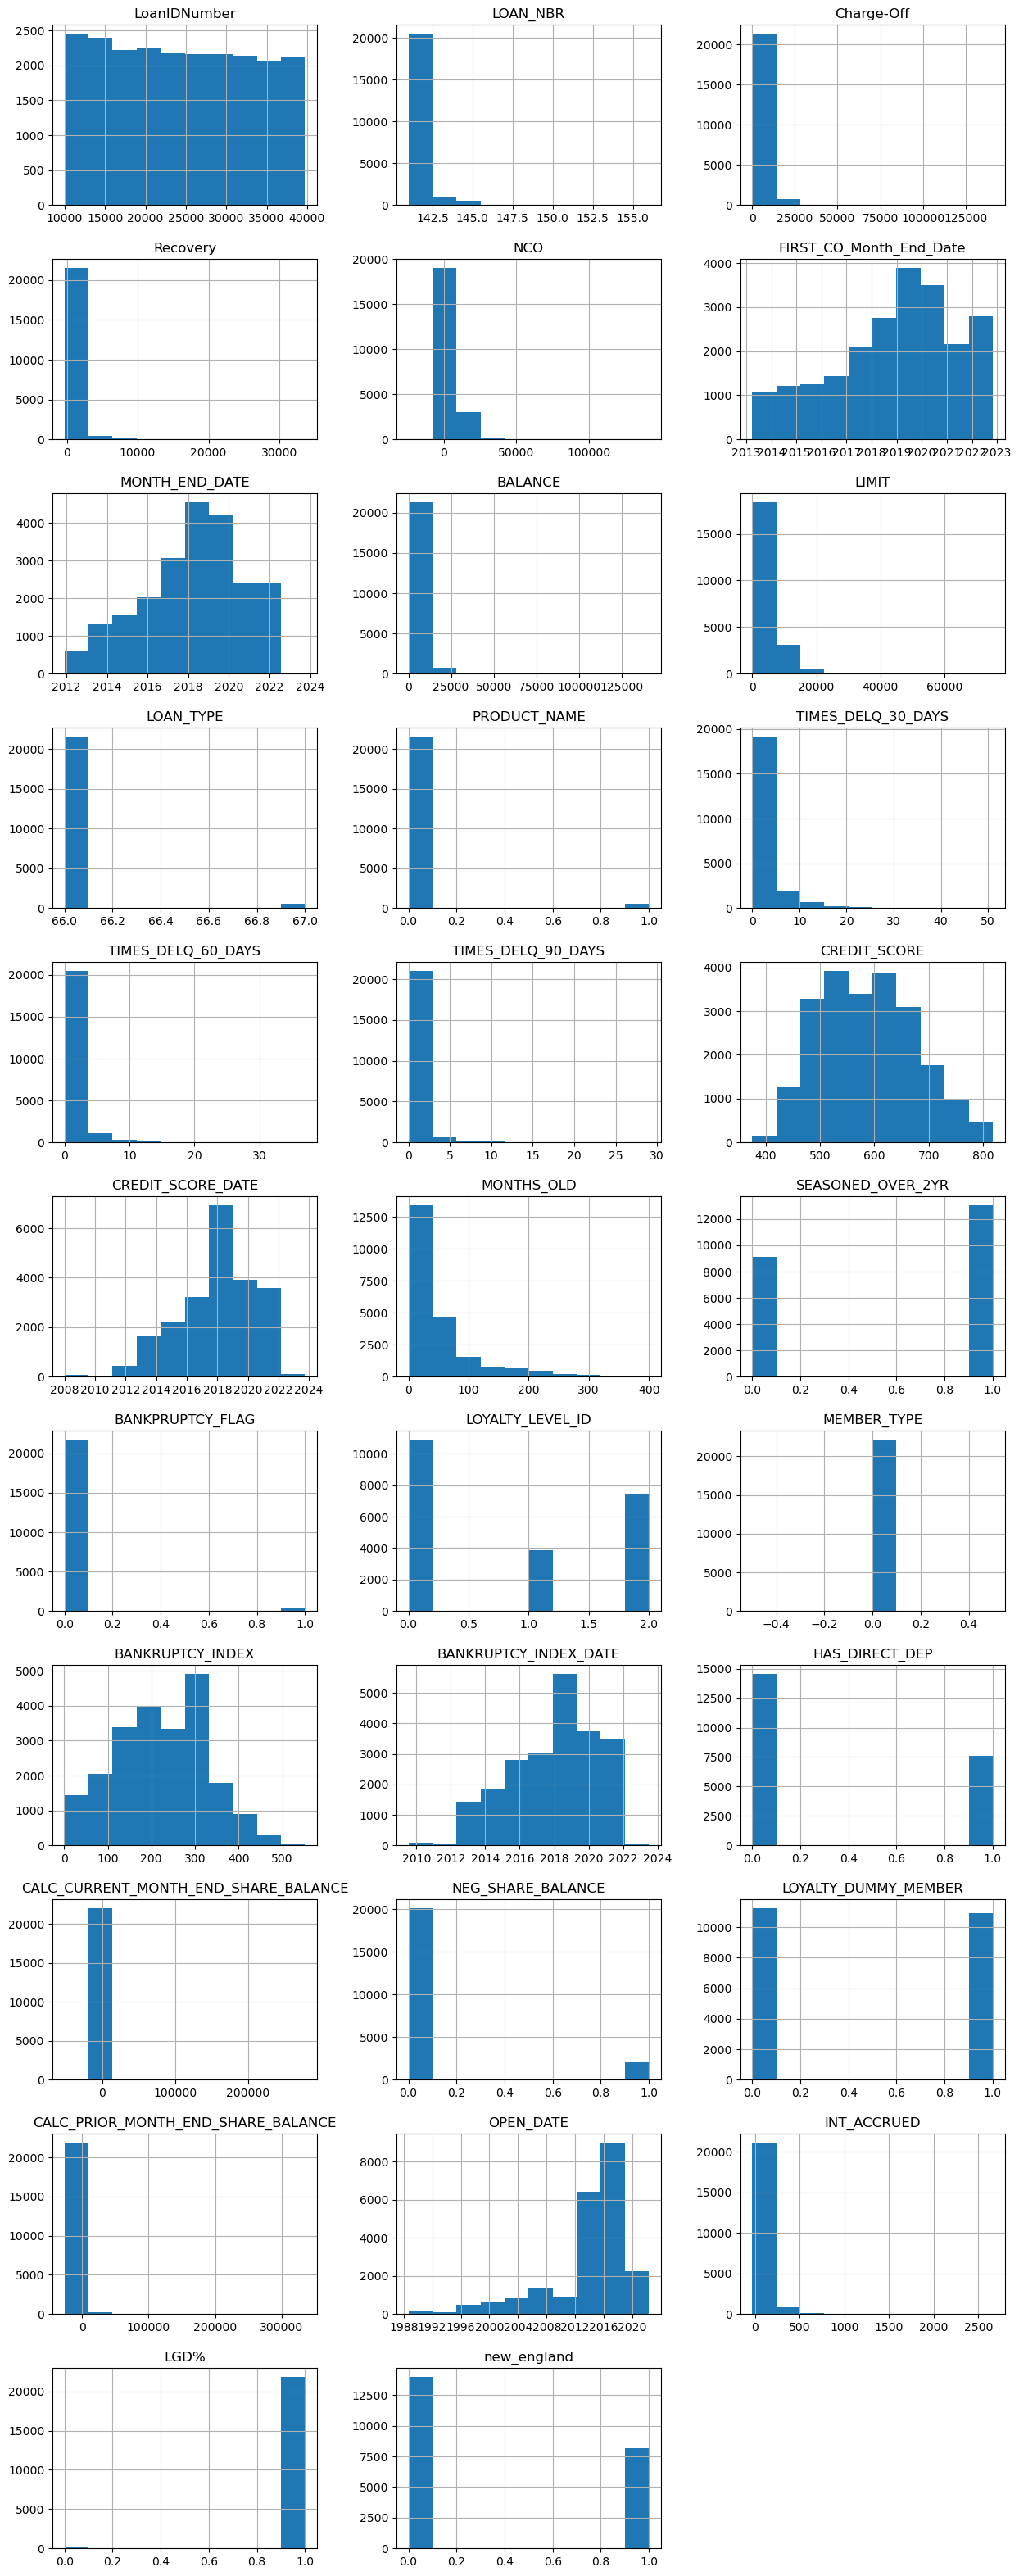

In [18]:
df.hist(figsize=(15, 40), layout=(11,3))

Importing various packages

In [19]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
import ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize ,
poly)

In [20]:
df.columns

Index(['LoanIDNumber', 'LOAN_NBR', 'Charge-Off', 'Recovery', 'NCO',
       'FIRST_CO_Month_End_Date', 'MONTH_END_DATE', 'BALANCE', 'LIMIT',
       'LOAN_TYPE', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_60_DAYS',
       'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE', 'CREDIT_SCORE_DATE',
       'CALC_LOANSTATUS', 'MONTHS_OLD', 'SEASONED_OVER_2YR',
       'BANKPRUPTCY_FLAG', 'LOYALTY_LEVEL_ID', 'MEMBER_TYPE',
       'BANKRUPTCY_INDEX', 'BANKRUPTCY_INDEX_DATE', 'HAS_DIRECT_DEP',
       'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
       'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
       'OPEN_DATE', 'INT_ACCRUED', 'LGD%', 'new_england'],
      dtype='object')

In [21]:
data_types = df.dtypes
print(data_types)

LoanIDNumber                                     int64
LOAN_NBR                                         int64
Charge-Off                                     float64
Recovery                                       float64
NCO                                            float64
FIRST_CO_Month_End_Date                 datetime64[ns]
MONTH_END_DATE                          datetime64[ns]
BALANCE                                        float64
LIMIT                                          float64
LOAN_TYPE                                        int32
PRODUCT_NAME                                     int64
TIMES_DELQ_30_DAYS                               int32
TIMES_DELQ_60_DAYS                               int32
TIMES_DELQ_90_DAYS                               int32
CREDIT_SCORE                                     int32
CREDIT_SCORE_DATE                       datetime64[ns]
CALC_LOANSTATUS                                 object
MONTHS_OLD                                       int32
SEASONED_O

Creating new columns to show differences between the 2 dates in the data provided (just to find a corelation)

In [22]:
# Create new columns for the differences from FIRST_CO_MONTH_END
df['Diff_FIRST_CO_MONTH_END'] = df['FIRST_CO_Month_End_Date'] - df['MONTH_END_DATE']
df['Diff_FIRST_CO_CREDIT_SCORE'] = df['FIRST_CO_Month_End_Date'] - df['CREDIT_SCORE_DATE']
df['Diff_FIRST_CO_BANKRUPTCY'] = df['FIRST_CO_Month_End_Date'] - df['BANKRUPTCY_INDEX_DATE']
# Create new columns for the differences from MONTH_END_DATE                   
df['Diff_MONTH_END_CREDIT_SCORE'] = df['MONTH_END_DATE'] - df['CREDIT_SCORE_DATE']
df['Diff_MONTH_END_BANKRUPTCY'] = df['MONTH_END_DATE'] - df['BANKRUPTCY_INDEX_DATE']
# Create new columns for the differences from OPEN_DATE
df['Diff_OPEN_DATE_FIRST_CO'] = df['FIRST_CO_Month_End_Date'] - df['OPEN_DATE']
df['Diff_OPEN_DATE_MONTH_END'] = df['MONTH_END_DATE'] - df['OPEN_DATE']
df['Diff_OPEN_DATE_CREDIT_SCORE'] = df['CREDIT_SCORE_DATE'] - df['OPEN_DATE']
df['Diff_OPEN_DATE_BANKRUPTCY'] = df['BANKRUPTCY_INDEX_DATE'] - df['OPEN_DATE']

# Convert them into days
df['Diff_FIRST_CO_MONTH_END'] = df['Diff_FIRST_CO_MONTH_END'].dt.days
df['Diff_FIRST_CO_CREDIT_SCORE'] = df['Diff_FIRST_CO_CREDIT_SCORE'].dt.days
df['Diff_FIRST_CO_BANKRUPTCY'] = df['Diff_FIRST_CO_BANKRUPTCY'].dt.days
df['Diff_MONTH_END_CREDIT_SCORE'] = df['Diff_MONTH_END_CREDIT_SCORE'].dt.days
df['Diff_MONTH_END_BANKRUPTCY'] = df['Diff_MONTH_END_BANKRUPTCY'].dt.days
df['Diff_OPEN_DATE_FIRST_CO'] = df['Diff_OPEN_DATE_FIRST_CO'].dt.days
df['Diff_OPEN_DATE_MONTH_END'] = df['Diff_OPEN_DATE_MONTH_END'].dt.days
df['Diff_OPEN_DATE_CREDIT_SCORE'] = df['Diff_OPEN_DATE_CREDIT_SCORE'].dt.days
df['Diff_OPEN_DATE_BANKRUPTCY'] = df['Diff_OPEN_DATE_BANKRUPTCY'].dt.days


Dropping Date columns to avoid date-time format

In [23]:
columns_to_drop = ['FIRST_CO_Month_End_Date', 'CREDIT_SCORE_DATE', 'BANKRUPTCY_INDEX_DATE', 'OPEN_DATE']

df.drop(columns=columns_to_drop, inplace=True)


In [24]:
# drop CALC_LOANSTATUS 

df.drop(columns='CALC_LOANSTATUS', inplace=True)


In [25]:
print(df[['Diff_FIRST_CO_MONTH_END', 'Diff_FIRST_CO_CREDIT_SCORE', 'Diff_FIRST_CO_BANKRUPTCY', 'Diff_MONTH_END_CREDIT_SCORE', 'Diff_MONTH_END_BANKRUPTCY','Diff_OPEN_DATE_MONTH_END','Diff_OPEN_DATE_CREDIT_SCORE', 'Diff_OPEN_DATE_BANKRUPTCY' ]])


       Diff_FIRST_CO_MONTH_END  Diff_FIRST_CO_CREDIT_SCORE  \
0                          153                         215   
1                          153                         242   
2                          304                         337   
3                          242                         248   
4                          151                         215   
...                        ...                         ...   
29796                      212                         243   
29797                      245                         364   
29798                      212                         243   
29799                      365                         396   
29800                      395                         518   

       Diff_FIRST_CO_BANKRUPTCY  Diff_MONTH_END_CREDIT_SCORE  \
0                           215                           62   
1                           242                           89   
2                           337                           33   

In [26]:
print(df[['Diff_OPEN_DATE_MONTH_END','Diff_OPEN_DATE_FIRST_CO', 'Diff_OPEN_DATE_CREDIT_SCORE', 'Diff_OPEN_DATE_BANKRUPTCY' ]])

       Diff_OPEN_DATE_MONTH_END  Diff_OPEN_DATE_FIRST_CO  \
0                          5790                     5943   
1                          5816                     5969   
2                          4813                     5117   
3                          2398                     2640   
4                          2138                     2289   
...                         ...                      ...   
29796                      8284                     8496   
29797                      6683                     6928   
29798                      3135                     3347   
29799                     10195                    10560   
29800                      1047                     1442   

       Diff_OPEN_DATE_CREDIT_SCORE  Diff_OPEN_DATE_BANKRUPTCY  
0                             5728                       5728  
1                             5727                       5727  
2                             4780                       4780  
3                      

In [27]:
#Created df_trial to show the stepwise VIF in this
df_trial = df.copy()

# Drop 'MONTH_END_DATE' column from df3
df_trial = df_trial.drop('MONTH_END_DATE', axis=1)

In [28]:
terms = df_trial.columns.drop('Recovery')
print(terms)

Index(['LoanIDNumber', 'LOAN_NBR', 'Charge-Off', 'NCO', 'BALANCE', 'LIMIT',
       'LOAN_TYPE', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_60_DAYS',
       'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE', 'MONTHS_OLD', 'SEASONED_OVER_2YR',
       'BANKPRUPTCY_FLAG', 'LOYALTY_LEVEL_ID', 'MEMBER_TYPE',
       'BANKRUPTCY_INDEX', 'HAS_DIRECT_DEP',
       'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
       'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
       'INT_ACCRUED', 'LGD%', 'new_england', 'Diff_FIRST_CO_MONTH_END',
       'Diff_FIRST_CO_CREDIT_SCORE', 'Diff_FIRST_CO_BANKRUPTCY',
       'Diff_MONTH_END_CREDIT_SCORE', 'Diff_MONTH_END_BANKRUPTCY',
       'Diff_OPEN_DATE_FIRST_CO', 'Diff_OPEN_DATE_MONTH_END',
       'Diff_OPEN_DATE_CREDIT_SCORE', 'Diff_OPEN_DATE_BANKRUPTCY'],
      dtype='object')


In [29]:
column_names = df_trial.columns
print(column_names)


Index(['LoanIDNumber', 'LOAN_NBR', 'Charge-Off', 'Recovery', 'NCO', 'BALANCE',
       'LIMIT', 'LOAN_TYPE', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS',
       'TIMES_DELQ_60_DAYS', 'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE',
       'MONTHS_OLD', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG',
       'LOYALTY_LEVEL_ID', 'MEMBER_TYPE', 'BANKRUPTCY_INDEX', 'HAS_DIRECT_DEP',
       'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
       'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
       'INT_ACCRUED', 'LGD%', 'new_england', 'Diff_FIRST_CO_MONTH_END',
       'Diff_FIRST_CO_CREDIT_SCORE', 'Diff_FIRST_CO_BANKRUPTCY',
       'Diff_MONTH_END_CREDIT_SCORE', 'Diff_MONTH_END_BANKRUPTCY',
       'Diff_OPEN_DATE_FIRST_CO', 'Diff_OPEN_DATE_MONTH_END',
       'Diff_OPEN_DATE_CREDIT_SCORE', 'Diff_OPEN_DATE_BANKRUPTCY'],
      dtype='object')


In [30]:
print(df_trial.dtypes)


LoanIDNumber                              int64
LOAN_NBR                                  int64
Charge-Off                              float64
Recovery                                float64
NCO                                     float64
BALANCE                                 float64
LIMIT                                   float64
LOAN_TYPE                                 int32
PRODUCT_NAME                              int64
TIMES_DELQ_30_DAYS                        int32
TIMES_DELQ_60_DAYS                        int32
TIMES_DELQ_90_DAYS                        int32
CREDIT_SCORE                              int32
MONTHS_OLD                                int32
SEASONED_OVER_2YR                         int32
BANKPRUPTCY_FLAG                          int32
LOYALTY_LEVEL_ID                          int32
MEMBER_TYPE                               int64
BANKRUPTCY_INDEX                          int32
HAS_DIRECT_DEP                            int32
CALC_CURRENT_MONTH_END_SHARE_BALANCE    

Split the data into train and test sets on the basis of years in MONTH_END_DATE

In [31]:
import pandas as pd


train_set = df.loc[(df['MONTH_END_DATE'] >= '2013-01-01') & (df['MONTH_END_DATE'] <= '2017-12-31'), :]

test_set_1 = df.loc[(df['MONTH_END_DATE'] >= '2018-01-01') & (df['MONTH_END_DATE'] <= '2020-03-31'), :]
test_set_2 = df.loc[(df['MONTH_END_DATE'] >= '2020-04-01') & (df['MONTH_END_DATE'] <= '2020-12-31'), :]
test_set_3 = df.loc[(df['MONTH_END_DATE'] >= '2021-01-01') & (df['MONTH_END_DATE'] <= '2021-12-31'), :]
test_set_4 = df.loc[(df['MONTH_END_DATE'] >= '2022-01-01') & (df['MONTH_END_DATE'] <= '2022-12-31'), :]


print("Train Set Shape:", train_set.shape)
print("Test Set 1 Shape:", test_set_1.shape)
print("Test Set 2 Shape:", test_set_2.shape)
print("Test Set 3 Shape:", test_set_3.shape)
print("Test Set 4 Shape:", test_set_4.shape)


Train Set Shape: (8730, 37)
Test Set 1 Shape: (8313, 37)
Test Set 2 Shape: (1504, 37)
Test Set 3 Shape: (2416, 37)
Test Set 4 Shape: (667, 37)


In [32]:
print("Columns of Train Set:", train_set.columns)


Columns of Train Set: Index(['LoanIDNumber', 'LOAN_NBR', 'Charge-Off', 'Recovery', 'NCO',
       'MONTH_END_DATE', 'BALANCE', 'LIMIT', 'LOAN_TYPE', 'PRODUCT_NAME',
       'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_60_DAYS', 'TIMES_DELQ_90_DAYS',
       'CREDIT_SCORE', 'MONTHS_OLD', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG',
       'LOYALTY_LEVEL_ID', 'MEMBER_TYPE', 'BANKRUPTCY_INDEX', 'HAS_DIRECT_DEP',
       'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
       'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
       'INT_ACCRUED', 'LGD%', 'new_england', 'Diff_FIRST_CO_MONTH_END',
       'Diff_FIRST_CO_CREDIT_SCORE', 'Diff_FIRST_CO_BANKRUPTCY',
       'Diff_MONTH_END_CREDIT_SCORE', 'Diff_MONTH_END_BANKRUPTCY',
       'Diff_OPEN_DATE_FIRST_CO', 'Diff_OPEN_DATE_MONTH_END',
       'Diff_OPEN_DATE_CREDIT_SCORE', 'Diff_OPEN_DATE_BANKRUPTCY'],
      dtype='object')


Drop MED to remove the date-time format

In [33]:
# Drop 'MONTH_END_DATE' column from train_set
train_set = train_set.drop('MONTH_END_DATE', axis=1)

# Drop 'MONTH_END_DATE' column from test_set_1
test_set_1 = test_set_1.drop('MONTH_END_DATE', axis=1)

# Drop 'MONTH_END_DATE' column from test_set_2
test_set_2 = test_set_2.drop('MONTH_END_DATE', axis=1)

# Drop 'MONTH_END_DATE' column from test_set_3
test_set_3 = test_set_3.drop('MONTH_END_DATE', axis=1)

# Drop 'MONTH_END_DATE' column from test_set_4
test_set_4 = test_set_4.drop('MONTH_END_DATE', axis=1)


In [34]:
print("Columns of Train Set:", train_set.columns)

Columns of Train Set: Index(['LoanIDNumber', 'LOAN_NBR', 'Charge-Off', 'Recovery', 'NCO', 'BALANCE',
       'LIMIT', 'LOAN_TYPE', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS',
       'TIMES_DELQ_60_DAYS', 'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE',
       'MONTHS_OLD', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG',
       'LOYALTY_LEVEL_ID', 'MEMBER_TYPE', 'BANKRUPTCY_INDEX', 'HAS_DIRECT_DEP',
       'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
       'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
       'INT_ACCRUED', 'LGD%', 'new_england', 'Diff_FIRST_CO_MONTH_END',
       'Diff_FIRST_CO_CREDIT_SCORE', 'Diff_FIRST_CO_BANKRUPTCY',
       'Diff_MONTH_END_CREDIT_SCORE', 'Diff_MONTH_END_BANKRUPTCY',
       'Diff_OPEN_DATE_FIRST_CO', 'Diff_OPEN_DATE_MONTH_END',
       'Diff_OPEN_DATE_CREDIT_SCORE', 'Diff_OPEN_DATE_BANKRUPTCY'],
      dtype='object')


<font color="yellow" style="font-size: 20pt;">VIF: Variance Inflation Factor</font>

VIF is a statistical measure in regression analysis used to assess multicollinearity among predictor variables. Multicollinearity arises when two or more independent variables are highly correlated, impacting the interpretation and reliability of regression results.

In our analysis, we retained variables with a VIF below 5, excluding Credit Score, which exhibited higher VIF.


In [35]:
X = MS(terms).fit_transform(df_trial)
y = df_trial['Recovery']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,9.359000e-14,5.450000e-15,1.716900e+01,0.000
LoanIDNumber,-2.108000e-16,6.140000e-18,-3.430500e+01,0.000
LOAN_NBR,-1.259000e-12,5.250000e-14,-2.398800e+01,0.000
Charge-Off,1.000000e+00,1.020000e-16,9.780000e+15,0.000
NCO,-1.000000e+00,3.670000e-17,-2.720000e+16,0.000
BALANCE,2.082000e-15,9.300000e-17,2.237500e+01,0.000
LIMIT,8.804000e-17,1.350000e-17,6.516000e+00,0.000
LOAN_TYPE,2.747000e-12,1.130000e-13,2.428800e+01,0.000
PRODUCT_NAME,-3.482000e-12,3.010000e-13,-1.155300e+01,0.000
TIMES_DELQ_30_DAYS,-1.310000e-14,2.620000e-14,-5.000000e-01,0.617


In [36]:
vals = [VIF(X, i)
for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
index=X.columns [1:])
vif

c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\19783\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,vif
LoanIDNumber,1.504425e+00
LOAN_NBR,1.058082e+00
Charge-Off,1.173096e+02
NCO,1.507364e+01
BALANCE,9.868863e+01
LIMIT,2.142900e+00
LOAN_TYPE,inf
PRODUCT_NAME,inf
TIMES_DELQ_30_DAYS,6.103153e+00
TIMES_DELQ_60_DAYS,1.759135e+01


In [37]:
print(df)

       LoanIDNumber  LOAN_NBR  Charge-Off  Recovery       NCO MONTH_END_DATE  \
0             39035       141    12649.67       0.0  12649.67     2014-08-31   
1             39056       141     8198.21       0.0   8198.21     2013-03-31   
2             39057       142     5779.70       0.0   5779.70     2013-04-30   
3             39058       143     1995.31       0.0   1995.31     2021-01-31   
4             39059       143     1818.41       0.0   1818.41     2018-11-30   
...             ...       ...         ...       ...       ...            ...   
29796         39731       141     3286.22       0.0   3286.22     2021-01-31   
29797         10334       142     9928.17       0.0   9928.17     2018-04-30   
29798         10335       141     9976.79       0.0   9976.79     2016-07-31   
29799         10336       141    17092.65       0.0  17092.65     2021-10-31   
29800         39732       142     1500.00       0.0   1500.00     2017-10-31   

        BALANCE    LIMIT  LOAN_TYPE  PR

In [38]:
def vif(dfx):
    vals = [VIF(dfx, i) for i in range(1, dfx.shape[1])]
    vif_var = pd.DataFrame({'vif': vals}, index=dfx.columns[1:])
    return vif_var

"Recovery" is the dependent variable, and we are excluding it out of our dataframe

In [39]:

independent_variables = df_trial.drop(columns=['Recovery'])

result = vif(independent_variables)
print(result)


c:\Users\19783\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               vif
LOAN_NBR                              1.058082e+00
Charge-Off                            1.173096e+02
NCO                                   1.507364e+01
BALANCE                               9.868863e+01
LIMIT                                 2.142900e+00
LOAN_TYPE                             2.972230e+04
PRODUCT_NAME                          1.241911e+00
TIMES_DELQ_30_DAYS                    6.103153e+00
TIMES_DELQ_60_DAYS                    1.759135e+01
TIMES_DELQ_90_DAYS                    8.210234e+00
CREDIT_SCORE                          1.888964e+00
MONTHS_OLD                            4.448981e+04
SEASONED_OVER_2YR                     1.696106e+00
BANKPRUPTCY_FLAG                      1.046513e+00
LOYALTY_LEVEL_ID                      8.926528e+00
MEMBER_TYPE                                    NaN
BANKRUPTCY_INDEX                      1.801810e+00
HAS_DIRECT_DEP                        2.106838e+00
CALC_CURRENT_MONTH_END_SHARE_BA

In [40]:
# Try : Removing MEMBER_TYPE since it has Nan

independent_variables1 = independent_variables.drop(columns=['MEMBER_TYPE'])
result = vif(independent_variables1)
print(result)

c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               vif
LOAN_NBR                              1.058082e+00
Charge-Off                            1.173096e+02
NCO                                   1.507364e+01
BALANCE                               9.868863e+01
LIMIT                                 2.142900e+00
LOAN_TYPE                             2.972230e+04
PRODUCT_NAME                          1.241911e+00
TIMES_DELQ_30_DAYS                    6.103153e+00
TIMES_DELQ_60_DAYS                    1.759135e+01
TIMES_DELQ_90_DAYS                    8.210234e+00
CREDIT_SCORE                          1.888964e+00
MONTHS_OLD                            4.448981e+04
SEASONED_OVER_2YR                     1.696106e+00
BANKPRUPTCY_FLAG                      1.046513e+00
LOYALTY_LEVEL_ID                      8.926528e+00
BANKRUPTCY_INDEX                      1.801810e+00
HAS_DIRECT_DEP                        2.106838e+00
CALC_CURRENT_MONTH_END_SHARE_BALANCE  3.337170e+00
NEG_SHARE_BALANCE              

In [41]:
# Try 1: Removing Diff_FIRST_CO_MONTH_END


independent_variables2 = independent_variables1.drop(columns=['Diff_FIRST_CO_MONTH_END'])

result = vif(independent_variables2)
print(result)

c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               vif
LOAN_NBR                              1.058082e+00
Charge-Off                            1.173096e+02
NCO                                   1.507364e+01
BALANCE                               9.868863e+01
LIMIT                                 2.142900e+00
LOAN_TYPE                             2.972230e+04
PRODUCT_NAME                          1.241911e+00
TIMES_DELQ_30_DAYS                    6.103153e+00
TIMES_DELQ_60_DAYS                    1.759135e+01
TIMES_DELQ_90_DAYS                    8.210234e+00
CREDIT_SCORE                          1.888964e+00
MONTHS_OLD                            4.448981e+04
SEASONED_OVER_2YR                     1.696106e+00
BANKPRUPTCY_FLAG                      1.046513e+00
LOYALTY_LEVEL_ID                      8.926528e+00
BANKRUPTCY_INDEX                      1.801810e+00
HAS_DIRECT_DEP                        2.106838e+00
CALC_CURRENT_MONTH_END_SHARE_BALANCE  3.337170e+00
NEG_SHARE_BALANCE              

In [42]:
# Try 2: Removing Diff_FIRST_CO_CREDIT_SCORE

independent_variables3 = independent_variables2.drop(columns=['Diff_FIRST_CO_CREDIT_SCORE'])

result = vif(independent_variables3)
print(result)


c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               vif
LOAN_NBR                              1.058082e+00
Charge-Off                            1.173096e+02
NCO                                   1.507364e+01
BALANCE                               9.868863e+01
LIMIT                                 2.142900e+00
LOAN_TYPE                             2.972230e+04
PRODUCT_NAME                          1.241911e+00
TIMES_DELQ_30_DAYS                    6.103153e+00
TIMES_DELQ_60_DAYS                    1.759135e+01
TIMES_DELQ_90_DAYS                    8.210234e+00
CREDIT_SCORE                          1.888964e+00
MONTHS_OLD                            4.448981e+04
SEASONED_OVER_2YR                     1.696106e+00
BANKPRUPTCY_FLAG                      1.046513e+00
LOYALTY_LEVEL_ID                      8.926528e+00
BANKRUPTCY_INDEX                      1.801810e+00
HAS_DIRECT_DEP                        2.106838e+00
CALC_CURRENT_MONTH_END_SHARE_BALANCE  3.337170e+00
NEG_SHARE_BALANCE              

In [43]:
# Try 3: Removing Diff_FIRST_CO_BANKRUPTCY


independent_variables4 = independent_variables3.drop(columns=['Diff_FIRST_CO_BANKRUPTCY'])

result = vif(independent_variables4)
print(result)


c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               vif
LOAN_NBR                              1.058082e+00
Charge-Off                            1.173096e+02
NCO                                   1.507364e+01
BALANCE                               9.868863e+01
LIMIT                                 2.142900e+00
LOAN_TYPE                             2.972230e+04
PRODUCT_NAME                          1.241911e+00
TIMES_DELQ_30_DAYS                    6.103153e+00
TIMES_DELQ_60_DAYS                    1.759135e+01
TIMES_DELQ_90_DAYS                    8.210234e+00
CREDIT_SCORE                          1.888964e+00
MONTHS_OLD                            4.448981e+04
SEASONED_OVER_2YR                     1.696106e+00
BANKPRUPTCY_FLAG                      1.046513e+00
LOYALTY_LEVEL_ID                      8.926528e+00
BANKRUPTCY_INDEX                      1.801810e+00
HAS_DIRECT_DEP                        2.106838e+00
CALC_CURRENT_MONTH_END_SHARE_BALANCE  3.337170e+00
NEG_SHARE_BALANCE              

In [44]:
# # Try 4: Removing Diff_MONTH_END_CREDIT_SCORE


independent_variables5 = independent_variables4.drop(columns=['Diff_MONTH_END_CREDIT_SCORE'])

result = vif(independent_variables5)
print(result)


c:\Users\19783\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                               vif
LOAN_NBR                              1.058082e+00
Charge-Off                            1.173096e+02
NCO                                   1.507364e+01
BALANCE                               9.868863e+01
LIMIT                                 2.142900e+00
LOAN_TYPE                             2.972230e+04
PRODUCT_NAME                          1.241911e+00
TIMES_DELQ_30_DAYS                    6.103153e+00
TIMES_DELQ_60_DAYS                    1.759135e+01
TIMES_DELQ_90_DAYS                    8.210234e+00
CREDIT_SCORE                          1.888964e+00
MONTHS_OLD                            4.448981e+04
SEASONED_OVER_2YR                     1.696106e+00
BANKPRUPTCY_FLAG                      1.046513e+00
LOYALTY_LEVEL_ID                      8.926528e+00
BANKRUPTCY_INDEX                      1.801810e+00
HAS_DIRECT_DEP                        2.106838e+00
CALC_CURRENT_MONTH_END_SHARE_BALANCE  3.337170e+00
NEG_SHARE_BALANCE              

In [45]:
# Try 5: Removing Diff_MONTH_END_BANKRUPTCY

independent_variables6 = independent_variables5.drop(columns=['Diff_MONTH_END_BANKRUPTCY'])

result = vif(independent_variables6)
print(result)

                                               vif
LOAN_NBR                                  1.058082
Charge-Off                              117.309603
NCO                                      15.073640
BALANCE                                  98.688625
LIMIT                                     2.142900
LOAN_TYPE                             29722.303917
PRODUCT_NAME                              1.241911
TIMES_DELQ_30_DAYS                        6.103153
TIMES_DELQ_60_DAYS                       17.591347
TIMES_DELQ_90_DAYS                        8.210234
CREDIT_SCORE                              1.888964
MONTHS_OLD                            44489.813134
SEASONED_OVER_2YR                         1.696106
BANKPRUPTCY_FLAG                          1.046513
LOYALTY_LEVEL_ID                          8.926528
BANKRUPTCY_INDEX                          1.801810
HAS_DIRECT_DEP                            2.106838
CALC_CURRENT_MONTH_END_SHARE_BALANCE      3.337170
NEG_SHARE_BALANCE              

In [46]:
#Try 6: Removing Diff_OPEN_DATE_MONTH_END

independent_variables7 = independent_variables6.drop(columns=['Diff_OPEN_DATE_MONTH_END'])

result = vif(independent_variables7)
print(result)

                                               vif
LOAN_NBR                                  1.058043
Charge-Off                              117.308128
NCO                                      15.073223
BALANCE                                  98.687963
LIMIT                                     2.142704
LOAN_TYPE                             29722.137179
PRODUCT_NAME                              1.241909
TIMES_DELQ_30_DAYS                        6.102851
TIMES_DELQ_60_DAYS                       17.588297
TIMES_DELQ_90_DAYS                        8.209523
CREDIT_SCORE                              1.888870
MONTHS_OLD                              628.223014
SEASONED_OVER_2YR                         1.695807
BANKPRUPTCY_FLAG                          1.046510
LOYALTY_LEVEL_ID                          8.925053
BANKRUPTCY_INDEX                          1.801794
HAS_DIRECT_DEP                            2.106651
CALC_CURRENT_MONTH_END_SHARE_BALANCE      3.336981
NEG_SHARE_BALANCE              

In [47]:
#Try 7: Removing Highest VIF LOAN_TYPE

independent_variables8 = independent_variables7.drop(columns=['LOAN_TYPE'])

result = vif(independent_variables8)
print(result)

                                              vif
LOAN_NBR                               437.332465
Charge-Off                             220.143909
NCO                                     26.786896
BALANCE                                185.588817
LIMIT                                    3.085600
PRODUCT_NAME                             1.063185
TIMES_DELQ_30_DAYS                       7.849282
TIMES_DELQ_60_DAYS                      19.944008
TIMES_DELQ_90_DAYS                       8.760606
CREDIT_SCORE                            87.661023
MONTHS_OLD                            1075.359195
SEASONED_OVER_2YR                        4.123791
BANKPRUPTCY_FLAG                         1.065467
LOYALTY_LEVEL_ID                        16.825512
BANKRUPTCY_INDEX                         9.933770
HAS_DIRECT_DEP                           3.200783
CALC_CURRENT_MONTH_END_SHARE_BALANCE     3.360518
NEG_SHARE_BALANCE                        1.173010
LOYALTY_DUMMY_MEMBER                    14.438124


In [48]:
#Try 8: Removing Highest VIF Diff_OPEN_DATE_BANKRUPTCY
independent_variables9 = independent_variables8.drop(columns=['Diff_OPEN_DATE_BANKRUPTCY'])

result = vif(independent_variables9)
print(result)

                                              vif
LOAN_NBR                               437.282369
Charge-Off                             220.109481
NCO                                     26.784599
BALANCE                                185.566851
LIMIT                                    3.085406
PRODUCT_NAME                             1.063173
TIMES_DELQ_30_DAYS                       7.845442
TIMES_DELQ_60_DAYS                      19.940571
TIMES_DELQ_90_DAYS                       8.759903
CREDIT_SCORE                            87.620646
MONTHS_OLD                            1044.760004
SEASONED_OVER_2YR                        4.115703
BANKPRUPTCY_FLAG                         1.065411
LOYALTY_LEVEL_ID                        16.822551
BANKRUPTCY_INDEX                         9.931938
HAS_DIRECT_DEP                           3.200760
CALC_CURRENT_MONTH_END_SHARE_BALANCE     3.360125
NEG_SHARE_BALANCE                        1.172997
LOYALTY_DUMMY_MEMBER                    14.435365


In [49]:
# Try 9: Removing Highest VIF MONTHS_OLD

independent_variables10 = independent_variables9.drop(columns=['MONTHS_OLD'])

result = vif(independent_variables10)
print(result)

                                             vif
LOAN_NBR                              431.060115
Charge-Off                            219.846615
NCO                                    26.776366
BALANCE                               185.409043
LIMIT                                   3.085216
PRODUCT_NAME                            1.063124
TIMES_DELQ_30_DAYS                      7.845049
TIMES_DELQ_60_DAYS                     19.938494
TIMES_DELQ_90_DAYS                      8.759832
CREDIT_SCORE                           87.376156
SEASONED_OVER_2YR                       4.115046
BANKPRUPTCY_FLAG                        1.065404
LOYALTY_LEVEL_ID                       16.819329
BANKRUPTCY_INDEX                        9.909713
HAS_DIRECT_DEP                          3.200501
CALC_CURRENT_MONTH_END_SHARE_BALANCE    3.360040
NEG_SHARE_BALANCE                       1.172972
LOYALTY_DUMMY_MEMBER                   14.435160
CALC_PRIOR_MONTH_END_SHARE_BALANCE      3.399973
INT_ACCRUED         

In [50]:
# Try 10: Removing Highest VIF LOAN_NBR
independent_variables11 = independent_variables10.drop(columns=['LOAN_NBR'])

result = vif(independent_variables11)
print(result)

                                             vif
Charge-Off                            165.283888
NCO                                    26.776358
BALANCE                               131.911321
LIMIT                                   3.062543
PRODUCT_NAME                            1.062135
TIMES_DELQ_30_DAYS                      7.843635
TIMES_DELQ_60_DAYS                     19.937461
TIMES_DELQ_90_DAYS                      8.759524
CREDIT_SCORE                           75.521553
SEASONED_OVER_2YR                       4.081810
BANKPRUPTCY_FLAG                        1.065195
LOYALTY_LEVEL_ID                       16.058547
BANKRUPTCY_INDEX                        9.852302
HAS_DIRECT_DEP                          3.199567
CALC_CURRENT_MONTH_END_SHARE_BALANCE    3.359211
NEG_SHARE_BALANCE                       1.172367
LOYALTY_DUMMY_MEMBER                   13.691205
CALC_PRIOR_MONTH_END_SHARE_BALANCE      3.398705
INT_ACCRUED                             2.394872
LGD%                

In [51]:
# Try 11: Removing Highest VIF Diff_OPEN_DATE_FIRST_CO
independent_variables12 = independent_variables11.drop(columns=['Diff_OPEN_DATE_FIRST_CO'])

result = vif(independent_variables12)
print(result)

                                             vif
Charge-Off                            162.533170
NCO                                    26.744315
BALANCE                               128.474603
LIMIT                                   3.045384
PRODUCT_NAME                            1.061850
TIMES_DELQ_30_DAYS                      7.838154
TIMES_DELQ_60_DAYS                     19.935534
TIMES_DELQ_90_DAYS                      8.753000
CREDIT_SCORE                           73.811554
SEASONED_OVER_2YR                       4.075292
BANKPRUPTCY_FLAG                        1.064775
LOYALTY_LEVEL_ID                       16.029347
BANKRUPTCY_INDEX                        9.845185
HAS_DIRECT_DEP                          3.199126
CALC_CURRENT_MONTH_END_SHARE_BALANCE    3.359194
NEG_SHARE_BALANCE                       1.172180
LOYALTY_DUMMY_MEMBER                   13.666121
CALC_PRIOR_MONTH_END_SHARE_BALANCE      3.397766
INT_ACCRUED                             2.383650
LGD%                

In [52]:
# Try 12: Removing Highest VIF LGD%
independent_variables13 = independent_variables12.drop(columns=['LGD%'])

result = vif(independent_variables13)
print(result)

                                             vif
Charge-Off                            139.493117
NCO                                    26.734846
BALANCE                               106.283946
LIMIT                                   2.962241
PRODUCT_NAME                            1.060388
TIMES_DELQ_30_DAYS                      7.822922
TIMES_DELQ_60_DAYS                     19.921979
TIMES_DELQ_90_DAYS                      8.743214
CREDIT_SCORE                           40.804447
SEASONED_OVER_2YR                       4.013836
BANKPRUPTCY_FLAG                        1.063718
LOYALTY_LEVEL_ID                       13.800623
BANKRUPTCY_INDEX                        9.665325
HAS_DIRECT_DEP                          3.197886
CALC_CURRENT_MONTH_END_SHARE_BALANCE    3.358956
NEG_SHARE_BALANCE                       1.169178
LOYALTY_DUMMY_MEMBER                   11.748172
CALC_PRIOR_MONTH_END_SHARE_BALANCE      3.394500
INT_ACCRUED                             2.338159
new_england         

In [53]:
# Try 13: Removing Highest VIF Charge-Off
independent_variables14 = independent_variables13.drop(columns=['Charge-Off'])

result = vif(independent_variables14)
print(result)

                                            vif
NCO                                   19.637613
BALANCE                               23.656851
LIMIT                                  2.961674
PRODUCT_NAME                           1.059796
TIMES_DELQ_30_DAYS                     7.822312
TIMES_DELQ_60_DAYS                    19.921451
TIMES_DELQ_90_DAYS                     8.743201
CREDIT_SCORE                          40.779020
SEASONED_OVER_2YR                      4.013822
BANKPRUPTCY_FLAG                       1.063717
LOYALTY_LEVEL_ID                      13.794260
BANKRUPTCY_INDEX                       9.641646
HAS_DIRECT_DEP                         3.197381
CALC_CURRENT_MONTH_END_SHARE_BALANCE   3.358408
NEG_SHARE_BALANCE                      1.169178
LOYALTY_DUMMY_MEMBER                  11.746404
CALC_PRIOR_MONTH_END_SHARE_BALANCE     3.394336
INT_ACCRUED                            2.337383
new_england                            1.900598
Diff_OPEN_DATE_CREDIT_SCORE            3

In [54]:
# Try 14: Removing Highest VIF NCO
independent_variables15 = independent_variables14.drop(columns=['NCO'])

result = vif(independent_variables15)
print(result)

                                            vif
BALANCE                                4.772482
LIMIT                                  2.961512
PRODUCT_NAME                           1.059004
TIMES_DELQ_30_DAYS                     7.819853
TIMES_DELQ_60_DAYS                    19.921189
TIMES_DELQ_90_DAYS                     8.743201
CREDIT_SCORE                          40.766317
SEASONED_OVER_2YR                      4.013554
BANKPRUPTCY_FLAG                       1.063629
LOYALTY_LEVEL_ID                      13.794253
BANKRUPTCY_INDEX                       9.639849
HAS_DIRECT_DEP                         3.197374
CALC_CURRENT_MONTH_END_SHARE_BALANCE   3.358126
NEG_SHARE_BALANCE                      1.168939
LOYALTY_DUMMY_MEMBER                  11.745563
CALC_PRIOR_MONTH_END_SHARE_BALANCE     3.393851
INT_ACCRUED                            2.337241
new_england                            1.900598
Diff_OPEN_DATE_CREDIT_SCORE            3.080073


In [55]:
# Try 15: Removing Highest VIF TIMES_DELQ_60_DAYS
independent_variables16 = independent_variables15.drop(columns=['TIMES_DELQ_60_DAYS'])

result = vif(independent_variables16)
print(result)

                                            vif
BALANCE                                4.761503
LIMIT                                  2.959343
PRODUCT_NAME                           1.058997
TIMES_DELQ_30_DAYS                     2.962347
TIMES_DELQ_90_DAYS                     2.090042
CREDIT_SCORE                          40.760115
SEASONED_OVER_2YR                      4.001950
BANKPRUPTCY_FLAG                       1.063576
LOYALTY_LEVEL_ID                      13.784848
BANKRUPTCY_INDEX                       9.639144
HAS_DIRECT_DEP                         3.197195
CALC_CURRENT_MONTH_END_SHARE_BALANCE   3.357956
NEG_SHARE_BALANCE                      1.168664
LOYALTY_DUMMY_MEMBER                  11.741618
CALC_PRIOR_MONTH_END_SHARE_BALANCE     3.393247
INT_ACCRUED                            2.336443
new_england                            1.900496
Diff_OPEN_DATE_CREDIT_SCORE            3.070774


In [56]:
# Try 16: Removing Highest VIF LOYALTY_LEVEL_ID
independent_variables17 = independent_variables16.drop(columns=['LOYALTY_LEVEL_ID'])

result = vif(independent_variables17)
print(result)

                                            vif
BALANCE                                4.755328
LIMIT                                  2.947350
PRODUCT_NAME                           1.058726
TIMES_DELQ_30_DAYS                     2.946079
TIMES_DELQ_90_DAYS                     2.088132
CREDIT_SCORE                          30.440933
SEASONED_OVER_2YR                      3.962334
BANKPRUPTCY_FLAG                       1.063388
BANKRUPTCY_INDEX                       9.565496
HAS_DIRECT_DEP                         2.521747
CALC_CURRENT_MONTH_END_SHARE_BALANCE   3.357614
NEG_SHARE_BALANCE                      1.158644
LOYALTY_DUMMY_MEMBER                   3.325672
CALC_PRIOR_MONTH_END_SHARE_BALANCE     3.393036
INT_ACCRUED                            2.327939
new_england                            1.880632
Diff_OPEN_DATE_CREDIT_SCORE            3.068528


<font color="yellow" style="font-size: 20pt;">Final Variables after applying VIF</font>

After a careful assessment of multicollinearity using VIF (Variance Inflation Factor), we have identified and retained the most influential variables. The final set of variables includes those with VIF values below the threshold, ensuring a more robust and reliable regression analysis.


In [57]:
# Try 17: Removing Highest VIF BANKRUPTCY_INDEX
independent_variables18 = independent_variables17.drop(columns=['BANKRUPTCY_INDEX'])

result = vif(independent_variables18)
print(result)

                                            vif
BALANCE                                4.471472
LIMIT                                  2.946687
PRODUCT_NAME                           1.058319
TIMES_DELQ_30_DAYS                     2.931247
TIMES_DELQ_90_DAYS                     2.088071
CREDIT_SCORE                          16.399239
SEASONED_OVER_2YR                      3.643875
BANKPRUPTCY_FLAG                       1.056910
HAS_DIRECT_DEP                         2.502164
CALC_CURRENT_MONTH_END_SHARE_BALANCE   3.357466
NEG_SHARE_BALANCE                      1.158613
LOYALTY_DUMMY_MEMBER                   3.294407
CALC_PRIOR_MONTH_END_SHARE_BALANCE     3.392636
INT_ACCRUED                            2.324841
new_england                            1.811908
Diff_OPEN_DATE_CREDIT_SCORE            3.041646


<font color="yellow" style="font-size: 30px;">MODEL 1 : LOGISTIC REGRESSION</font>

Logistic regression is a **statistical model** specifically designed for binary classification tasks, where the dependent variable has only two possible outcomes. In our model, it serves the purpose of predicting whether defaulted members are likely to repay their debt to DCU or not.

The model assesses the likelihood of recovery being greater than 0, providing valuable insights into the repayment behavior of members.



In [58]:
df3 = df.copy()

In [59]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, accuracy_score

# Target Variable
target_column = 'Recovery'

# Columns
allvars = df[['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP', 'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE', 'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE', 'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE']]

# Create design matrix
X = dmatrix("BALANCE + LIMIT + PRODUCT_NAME + TIMES_DELQ_30_DAYS + TIMES_DELQ_90_DAYS + CREDIT_SCORE + SEASONED_OVER_2YR + BANKPRUPTCY_FLAG + HAS_DIRECT_DEP + CALC_CURRENT_MONTH_END_SHARE_BALANCE + NEG_SHARE_BALANCE + LOYALTY_DUMMY_MEMBER + CALC_PRIOR_MONTH_END_SHARE_BALANCE + INT_ACCRUED + new_england + Diff_OPEN_DATE_CREDIT_SCORE - 1", data=df3, return_type='dataframe')

# Create binary target variable
y = (df['Recovery'] > 0).astype(int)

# Resample data
positive_indices = np.where(y == 1)[0]
negative_indices = np.where(y == 0)[0]
random_negative_indices = np.random.choice(negative_indices, size=3305, replace=True)
resampled_indices = np.concatenate([positive_indices, random_negative_indices])

# Use resampled indices to get the corresponding labels and features
X_resampled = X.iloc[resampled_indices]
y_resampled = y.iloc[resampled_indices]

# Fit logistic regression model on the resampled data
glm_resampled = sm.GLM(y_resampled, X_resampled, family=sm.families.Binomial())
results_resampled = glm_resampled.fit()

# Summarize results for resampled data
print(results_resampled.summary())

# Predict probabilities using the fitted model on the original data
probs = results_resampled.predict(X_resampled)

# Set a threshold (e.g., 0.5) to classify probabilities into binary predictions
threshold = 0.2
binary_predictions = (probs > threshold).astype(int)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_resampled, binary_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy
accuracy = accuracy_score(y_resampled, binary_predictions)
print("Accuracy:", accuracy)

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Recovery   No. Observations:                 6610
Model:                            GLM   Df Residuals:                     6594
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4506.3
Date:                Sat, 06 Jan 2024   Deviance:                       9012.5
Time:                        17:26:13   Pearson chi2:                 6.63e+03
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02256
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


Editing the columns in Train and test sets after finding out VIF

In [60]:
columns_to_keep = ['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS',
                   'TIMES_DELQ_90_DAYS', 'CREDIT_SCORE', 'SEASONED_OVER_2YR',
                   'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP', 'CALC_CURRENT_MONTH_END_SHARE_BALANCE',
                   'NEG_SHARE_BALANCE', 'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
                   'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE', 'Recovery']

# Keep only the specified columns in train_set
train_set = train_set.loc[:, columns_to_keep]

# Keep only the specified columns in test_set_1
test_set_1 = test_set_1.loc[:, columns_to_keep]

# Keep only the specified columns in test_set_2
test_set_2 = test_set_2.loc[:, columns_to_keep]

# Keep only the specified columns in test_set_3
test_set_3 = test_set_3.loc[:, columns_to_keep]

# Keep only the specified columns in test_set_4
test_set_4 = test_set_4.loc[:, columns_to_keep]


In [61]:
import statsmodels.api as sm
from patsy import dmatrix

# Target Column
target_column = 'Recovery'

# Variables
selected_columns = ['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_90_DAYS',
                     'CREDIT_SCORE', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP',
                     'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
                     'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
                     'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE']

# Create design matrix for the selected columns in the training set
X_train = dmatrix("BALANCE + LIMIT + PRODUCT_NAME + TIMES_DELQ_30_DAYS + TIMES_DELQ_90_DAYS + CREDIT_SCORE + SEASONED_OVER_2YR + BANKPRUPTCY_FLAG + HAS_DIRECT_DEP + CALC_CURRENT_MONTH_END_SHARE_BALANCE + NEG_SHARE_BALANCE + LOYALTY_DUMMY_MEMBER + CALC_PRIOR_MONTH_END_SHARE_BALANCE + INT_ACCRUED + new_england + Diff_OPEN_DATE_CREDIT_SCORE - 1", data=train_set, return_type='dataframe')

# Reset index of X_train to ensure proper alignment
X_train = X_train.reset_index(drop=True)

# Create binary target variable for the training set
y_train = (train_set['Recovery'] > 0).astype(int)

# Set the index of y_train to match the index of X_train
y_train.index = X_train.index

# Fit logistic regression model on the training data
glm_train = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results_train = glm_train.fit()

# Summarize results for the training data
print(results_train.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:               Recovery   No. Observations:                 8730
Model:                            GLM   Df Residuals:                     8714
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3702.0
Date:                Sat, 06 Jan 2024   Deviance:                       7404.0
Time:                        17:26:13   Pearson chi2:                 8.79e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01887
Covariance Type:            nonrobust                                         
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [62]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train, train_set['BANKPRUPTCY_FLAG'])

array([[7212,  153],
       [1319,   46]], dtype=int64)

In [63]:

from sklearn.metrics import confusion_matrix, accuracy_score

# Predict probabilities using the fitted model on the original data
probs_train = results_train.predict(exog=X_train)

# Set a threshold (e.g., 0.2) to classify probabilities into binary predictions for the training set
threshold = 0.2
binary_predictions_train = (probs_train > threshold).astype(int)

y_train = (train_set['Recovery'] > 0).astype(int)

# Reset indices to ensure they match
y_train.index = binary_predictions_train.index

# Create a confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, binary_predictions_train)

# Print the confusion matrix for the training set
print("Confusion Matrix (Training Set):")
print(conf_matrix_train)




Confusion Matrix (Training Set):
[[5832 1533]
 [ 909  456]]


In [64]:
# Calculate accuracy
accuracy = accuracy_score(y_train, binary_predictions_train)

# Calculate sensitivity
sensitivity = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])

# Calculate specificity
specificity = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

# Calculate prevalence
prevalence = (conf_matrix_train[1, 1] + conf_matrix_train[1, 0]) / np.sum(conf_matrix_train)

# Print
print("Accuracy:", accuracy)
print("Sensitivity (True Positive Rate):", sensitivity)
print("Specificity (True Negative Rate):", specificity)
print("Prevalence:", prevalence)


Accuracy: 0.7202749140893471
Sensitivity (True Positive Rate): 0.33406593406593404
Specificity (True Negative Rate): 0.7918533604887984
Prevalence: 0.1563573883161512


In [65]:

selected_features = ['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_90_DAYS',
                     'CREDIT_SCORE', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP',
                     'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
                     'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
                     'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE']

# Create design matrix for the selected features in the test set
X_test = dmatrix("BALANCE + LIMIT + PRODUCT_NAME + TIMES_DELQ_30_DAYS + TIMES_DELQ_90_DAYS + CREDIT_SCORE + SEASONED_OVER_2YR + BANKPRUPTCY_FLAG + HAS_DIRECT_DEP + CALC_CURRENT_MONTH_END_SHARE_BALANCE + NEG_SHARE_BALANCE + LOYALTY_DUMMY_MEMBER + CALC_PRIOR_MONTH_END_SHARE_BALANCE + INT_ACCRUED + new_england + Diff_OPEN_DATE_CREDIT_SCORE - 1", data=test_set_1, return_type='dataframe')

# Reset index of X_test to ensure proper alignment
X_test = X_test.reset_index(drop=True)

# Predict probabilities using the fitted model on the test set
probs_test = results_train.predict(exog=X_test)

# Set the same threshold used for training to classify probabilities into binary predictions for the test set
binary_predictions_test = (probs_test > threshold).astype(int)

y_test = (test_set_1['Recovery'] > 0).astype(int)

# Reset indices to ensure they match
y_test.index = binary_predictions_test.index

# Create a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, binary_predictions_test)

# Print the confusion matrix for the test set
print("Confusion Matrix (Test Set 1):")
print(conf_matrix_test)



Confusion Matrix (Test Set 1):
[[5460 1433]
 [1006  414]]


In [66]:
# Calculate sensitivity, specificity, prevalence, and accuracy for the test set

# Accuracy
accuracy_test = accuracy_score(y_test, binary_predictions_test)

# Sensitivity (True Positive Rate or Recall)
sensitivity_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])

# Specificity (True Negative Rate)
specificity_test = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])

# Prevalence
prevalence_test = (conf_matrix_test[1, 1] + conf_matrix_test[1, 0]) / np.sum(conf_matrix_test)


# Print the results for the test set
print("Accuracy:", accuracy_test)
print("Sensitivity (True Positive Rate):", sensitivity_test)
print("Specificity (True Negative Rate):", specificity_test)
print("Prevalence:", prevalence_test)

Accuracy: 0.7066041140382533
Sensitivity (True Positive Rate): 0.2915492957746479
Specificity (True Negative Rate): 0.7921079355868272
Prevalence: 0.17081679297485866


In [67]:

selected_features = ['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_90_DAYS',
                     'CREDIT_SCORE', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP',
                     'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
                     'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
                     'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE']

# Create design matrix for the selected features in the test set
X_test_2 = dmatrix("BALANCE + LIMIT + PRODUCT_NAME + TIMES_DELQ_30_DAYS + TIMES_DELQ_90_DAYS + CREDIT_SCORE + SEASONED_OVER_2YR + BANKPRUPTCY_FLAG + HAS_DIRECT_DEP + CALC_CURRENT_MONTH_END_SHARE_BALANCE + NEG_SHARE_BALANCE + LOYALTY_DUMMY_MEMBER + CALC_PRIOR_MONTH_END_SHARE_BALANCE + INT_ACCRUED + new_england + Diff_OPEN_DATE_CREDIT_SCORE - 1", data=test_set_2, return_type='dataframe')

# Reset index of X_test_2 to ensure proper alignment
X_test_2 = X_test_2.reset_index(drop=True)

# Predict probabilities using the fitted model on the test set
probs_test_2 = results_train.predict(exog=X_test_2)

# Set the same threshold used for training to classify probabilities into binary predictions for the test set
binary_predictions_test_2 = (probs_test_2 > threshold).astype(int)


y_test_2 = (test_set_2['Recovery'] > 0).astype(int)

# Reset indices to ensure they match
y_test_2.index = binary_predictions_test_2.index

# Create a confusion matrix for the test set
conf_matrix_test_2 = confusion_matrix(y_test_2, binary_predictions_test_2)

# Print the confusion matrix for the test set
print("Confusion Matrix (Test Set 2):")
print(conf_matrix_test_2)



Confusion Matrix (Test Set 2):
[[1064  278]
 [ 114   48]]


In [68]:
# Calculate sensitivity, specificity, prevalence, and accuracy for the second test set

# Accuracy
accuracy_test_2 = accuracy_score(y_test_2, binary_predictions_test_2)

# Sensitivity (True Positive Rate or Recall)
sensitivity_test_2 = conf_matrix_test_2[1, 1] / (conf_matrix_test_2[1, 1] + conf_matrix_test_2[1, 0])

# Specificity (True Negative Rate)
specificity_test_2 = conf_matrix_test_2[0, 0] / (conf_matrix_test_2[0, 0] + conf_matrix_test_2[0, 1])

# Prevalence
prevalence_test_2 = (conf_matrix_test_2[1, 1] + conf_matrix_test_2[1, 0]) / np.sum(conf_matrix_test_2)

# Print the results for the second test set
print("Accuracy:", accuracy_test_2)
print("Sensitivity (True Positive Rate):", sensitivity_test_2)
print("Specificity (True Negative Rate):", specificity_test_2)
print("Prevalence:", prevalence_test_2)


Accuracy: 0.7393617021276596
Sensitivity (True Positive Rate): 0.2962962962962963
Specificity (True Negative Rate): 0.7928464977645305
Prevalence: 0.1077127659574468


In [69]:

selected_features = ['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_90_DAYS',
                     'CREDIT_SCORE', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP',
                     'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
                     'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
                     'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE']

# Create design matrix for the selected features in the test set
X_test_3 = dmatrix("BALANCE + LIMIT + PRODUCT_NAME + TIMES_DELQ_30_DAYS + TIMES_DELQ_90_DAYS + CREDIT_SCORE + SEASONED_OVER_2YR + BANKPRUPTCY_FLAG + HAS_DIRECT_DEP + CALC_CURRENT_MONTH_END_SHARE_BALANCE + NEG_SHARE_BALANCE + LOYALTY_DUMMY_MEMBER + CALC_PRIOR_MONTH_END_SHARE_BALANCE + INT_ACCRUED + new_england + Diff_OPEN_DATE_CREDIT_SCORE - 1", data=test_set_3, return_type='dataframe')

# Reset index of X_test_3 to ensure proper alignment
X_test_3 = X_test_3.reset_index(drop=True)

# Predict probabilities using the fitted model on the test set
probs_test_3 = results_train.predict(exog=X_test_3)

# Set the same threshold used for training to classify probabilities into binary predictions for the test set
binary_predictions_test_3 = (probs_test_3 > threshold).astype(int)


y_test_3 = (test_set_3['Recovery'] > 0).astype(int)

# Reset indices to ensure they match
y_test_3.index = binary_predictions_test_3.index

# Create a confusion matrix for the test set
conf_matrix_test_3 = confusion_matrix(y_test_3, binary_predictions_test_3)

# Print the confusion matrix for the test set
print("Confusion Matrix (Test Set 3):")
print(conf_matrix_test_3)

# Calculate accuracy for the test set
accuracy_test_3 = accuracy_score(y_test_3, binary_predictions_test_3)
print("Accuracy (Test Set 3):", accuracy_test_3)


Confusion Matrix (Test Set 3):
[[1666  595]
 [  94   61]]
Accuracy (Test Set 3): 0.714817880794702


In [70]:
# Calculate sensitivity, specificity, prevalence, and accuracy for the second test set

# Accuracy
accuracy_test_3 = accuracy_score(y_test_3, binary_predictions_test_3)

# Sensitivity (True Positive Rate or Recall)
sensitivity_test_3 = conf_matrix_test_3[1, 1] / (conf_matrix_test_3[1, 1] + conf_matrix_test_3[1, 0])

# Specificity (True Negative Rate)
specificity_test_3 = conf_matrix_test_3[0, 0] / (conf_matrix_test_3[0, 0] + conf_matrix_test_3[0, 1])

# Prevalence
prevalence_test_3 = (conf_matrix_test_3[1, 1] + conf_matrix_test_3[1, 0]) / np.sum(conf_matrix_test_3)

# Print the results for the second test set
print("Accuracy:", accuracy_test_3)
print("Sensitivity (True Positive Rate):", sensitivity_test_3)
print("Specificity (True Negative Rate):", specificity_test_3)
print("Prevalence:", prevalence_test_3)


Accuracy: 0.714817880794702
Sensitivity (True Positive Rate): 0.3935483870967742
Specificity (True Negative Rate): 0.7368421052631579
Prevalence: 0.06415562913907284


In [71]:

selected_features = ['BALANCE', 'LIMIT', 'PRODUCT_NAME', 'TIMES_DELQ_30_DAYS', 'TIMES_DELQ_90_DAYS',
                     'CREDIT_SCORE', 'SEASONED_OVER_2YR', 'BANKPRUPTCY_FLAG', 'HAS_DIRECT_DEP',
                     'CALC_CURRENT_MONTH_END_SHARE_BALANCE', 'NEG_SHARE_BALANCE',
                     'LOYALTY_DUMMY_MEMBER', 'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
                     'INT_ACCRUED', 'new_england', 'Diff_OPEN_DATE_CREDIT_SCORE']

# Create design matrix for the selected features in the test set
X_test_4 = dmatrix("BALANCE + LIMIT + PRODUCT_NAME + TIMES_DELQ_30_DAYS + TIMES_DELQ_90_DAYS + CREDIT_SCORE + SEASONED_OVER_2YR + BANKPRUPTCY_FLAG + HAS_DIRECT_DEP + CALC_CURRENT_MONTH_END_SHARE_BALANCE + NEG_SHARE_BALANCE + LOYALTY_DUMMY_MEMBER + CALC_PRIOR_MONTH_END_SHARE_BALANCE + INT_ACCRUED + new_england + Diff_OPEN_DATE_CREDIT_SCORE - 1", data=test_set_4, return_type='dataframe')

# Reset index of X_test_4 to ensure proper alignment
X_test_4 = X_test_4.reset_index(drop=True)

# Predict probabilities using the fitted model on the test set
probs_test_4 = results_train.predict(exog=X_test_4)

# Set the same threshold used for training to classify probabilities into binary predictions for the test set
binary_predictions_test_4 = (probs_test_4 > threshold).astype(int)

y_test_4 = (test_set_4['Recovery'] > 0).astype(int)

# Reset indices to ensure they match
y_test_4.index = binary_predictions_test_4.index

# Create a confusion matrix for the test set
conf_matrix_test_4 = confusion_matrix(y_test_4, binary_predictions_test_4)

# Print the confusion matrix for the test set
print("Confusion Matrix (Test Set 4):")
print(conf_matrix_test_4)


Confusion Matrix (Test Set 4):
[[476 153]
 [ 25  13]]


In [72]:
# Calculate sensitivity, specificity, prevalence, and accuracy for the second test set

# Accuracy
accuracy_test_4 = accuracy_score(y_test_4, binary_predictions_test_4)

# Sensitivity (True Positive Rate or Recall)
sensitivity_test_4 = conf_matrix_test_4[1, 1] / (conf_matrix_test_4[1, 1] + conf_matrix_test_4[1, 0])

# Specificity (True Negative Rate)
specificity_test_4 = conf_matrix_test_4[0, 0] / (conf_matrix_test_4[0, 0] + conf_matrix_test_4[0, 1])

# Prevalence
prevalence_test_4 = (conf_matrix_test_4[1, 1] + conf_matrix_test_4[1, 0]) / np.sum(conf_matrix_test_4)

# Print the results for the second test set
print("Accuracy:", accuracy_test_4)
print("Sensitivity (True Positive Rate):", sensitivity_test_4)
print("Specificity (True Negative Rate):", specificity_test_4)
print("Prevalence:", prevalence_test_4)

Accuracy: 0.7331334332833583
Sensitivity (True Positive Rate): 0.34210526315789475
Specificity (True Negative Rate): 0.7567567567567568
Prevalence: 0.05697151424287856


<font color="yellow" style="font-size: 25px;">MODEL 2 : LINEAR REGRESSION</font>

In linear regression, we model the recovery amount as the dependent variable. We consider one or more independent variables believed to influence the recovery amount. The model assumes a linear relationship between these variables and the recovery amount.

### Key Components:

1. **Dependent Variable:**
   - The recovery amount is designated as the dependent variable.

2. **Independent Variables:**
   - One or more independent variables are chosen based on the belief that they impact the recovery amount.

3. **Assumption of Linearity:**
   - Linear regression assumes a linear relationship between the chosen independent variables and the recovery amount.

4. **Residuals:**
   - The model assumes that the residuals, representing differences between actual and predicted values, follow a normal distribution.

### Objective:
The goal is to understand and quantify how changes in the independent variables are associated with changes in the recovery amount, providing insights for prediction and analysis.


In [73]:
# Using only the observation where Recovery is > $0. 

df1 = df.copy()
df1 = df[df['Recovery'] > 0]
print(df1)

# List of columns to keep
columns_to_keep = [
    'LIMIT',
    'PRODUCT_NAME',
    'TIMES_DELQ_30_DAYS',
    'TIMES_DELQ_90_DAYS',
    'CREDIT_SCORE',
    'SEASONED_OVER_2YR',
    'BANKPRUPTCY_FLAG',
    'HAS_DIRECT_DEP',
    'CALC_CURRENT_MONTH_END_SHARE_BALANCE',
    'NEG_SHARE_BALANCE',
    'LOYALTY_DUMMY_MEMBER',
    'CALC_PRIOR_MONTH_END_SHARE_BALANCE',
    'INT_ACCRUED',
    'new_england',
    'Diff_OPEN_DATE_CREDIT_SCORE',
    'BALANCE',
    'Recovery'
]



       LoanIDNumber  LOAN_NBR  Charge-Off  Recovery       NCO MONTH_END_DATE  \
14            39069       142      999.87    999.87      0.00     2014-08-31   
17            39072       141     2462.07   2462.07      0.00     2013-04-30   
27            39082       142    25266.88   6033.25  19233.63     2017-04-30   
29            39084       141     2922.61   2767.77    154.84     2014-06-30   
47            39102       141      932.62     25.44    907.18     2016-02-29   
...             ...       ...         ...       ...       ...            ...   
29753         10294       141        0.00    100.00   -100.00     2012-11-30   
29766         10304       141        0.00   3320.30  -3320.30     2013-10-31   
29769         10307       141        0.00    505.49   -505.49     2012-10-31   
29789         10327       141      111.44    111.44      0.00     2020-01-31   
29795         10333       141    12997.20   6093.75   6903.45     2014-03-31   

        BALANCE    LIMIT  LOAN_TYPE  PR

In [74]:
# For Visualizations
fp = r"New_updated.xlsx"
df1.to_excel(fp, sheet_name='Edit 3')


print("Modified data saved to")

Modified data saved to


In [75]:

# Create the new DataFrame with selected columns
df2 = df1[columns_to_keep]
print(df2)


         LIMIT  PRODUCT_NAME  TIMES_DELQ_30_DAYS  TIMES_DELQ_90_DAYS  \
14      1000.0             0                   0                   0   
17         0.0             0                   1                   0   
27         0.0             0                   6                   0   
29         0.0             0                   1                   0   
47         0.0             0                   5                   0   
...        ...           ...                 ...                 ...   
29753      0.0             0                   1                   1   
29766      0.0             0                   5                   0   
29769   5000.0             1                   0                   0   
29789  18500.0             0                   0                   0   
29795  13000.0             0                   0                   0   

       CREDIT_SCORE  SEASONED_OVER_2YR  BANKPRUPTCY_FLAG  HAS_DIRECT_DEP  \
14              620                  1                 0   

In [76]:
# Result without training and testing
X = df2.drop('Recovery', axis=1)
y = df1['Recovery']
X = sm.add_constant(X)  # Add a constant term (intercept) to the independent variables
print(X.shape)
print(y.shape)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


(3305, 17)
(3305,)
                            OLS Regression Results                            
Dep. Variable:               Recovery   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     143.8
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        17:26:14   Log-Likelihood:                -29805.
No. Observations:                3305   AIC:                         5.964e+04
Df Residuals:                    3288   BIC:                         5.975e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

C:\Users\19783\AppData\Local\Temp\ipykernel_16300\1491640429.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predicted_Recovery'] = predicted_Recovery


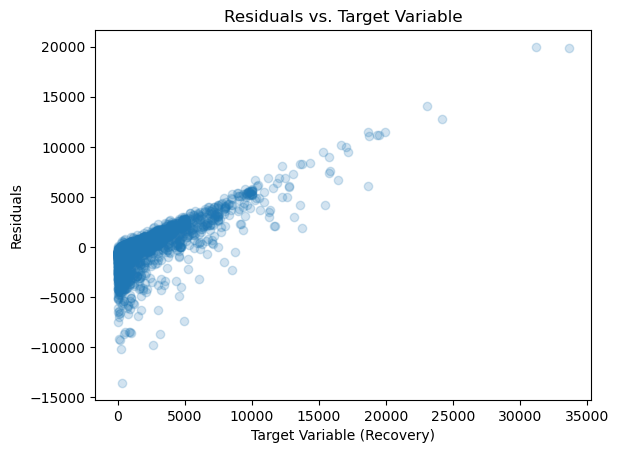

In [77]:
# Calculate the predicted values
predicted_Recovery = results.fittedvalues

# Add the predicted_Recovery column to df2
df2['predicted_Recovery'] = predicted_Recovery


# Calculate the residuals
residuals = y - predicted_Recovery

# Create a scatter plot of residuals vs. the target variable
import matplotlib.pyplot as plt

plt.scatter(y, residuals, alpha=0.2)
plt.xlabel('Target Variable (Recovery)')
plt.ylabel('Residuals')
plt.title('Residuals vs. Target Variable')
plt.show()


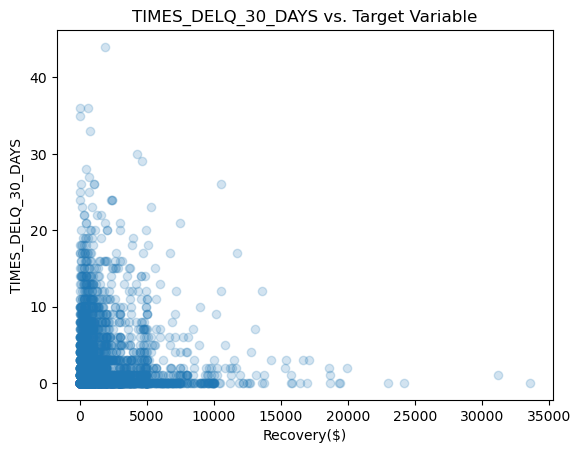

In [78]:
# scatter plot of residuals vs. the target variable
import matplotlib.pyplot as plt

plt.scatter(y, df2['TIMES_DELQ_30_DAYS'], alpha=0.2)
plt.xlabel('Recovery($)')
plt.ylabel('TIMES_DELQ_30_DAYS')
plt.title('TIMES_DELQ_30_DAYS vs. Target Variable')
plt.show()

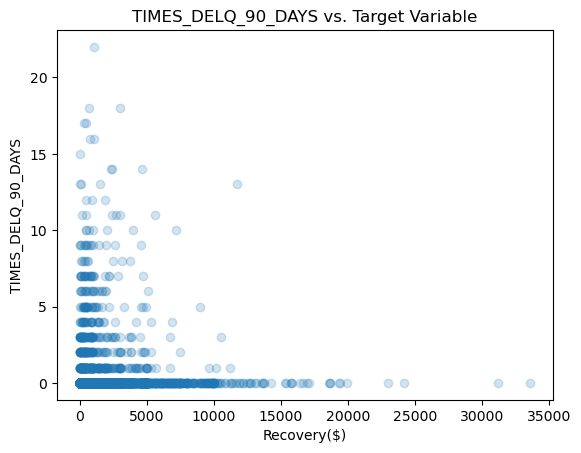

In [79]:
# scatter plot of residuals vs. the target variable
import matplotlib.pyplot as plt

plt.scatter(y, df2['TIMES_DELQ_90_DAYS'], alpha=0.2)
plt.xlabel('Recovery($)')
plt.ylabel('TIMES_DELQ_90_DAYS')
plt.title('TIMES_DELQ_90_DAYS vs. Target Variable')
plt.show()

In [80]:
# Create new columns TrueLGD & PredictedLGD
df2['TrueLGD'] = 1 - (df2['Recovery'] / df2['BALANCE'])
df2['PredictedLGD'] = 1 - (df2['predicted_Recovery'] / df2['BALANCE'])

C:\Users\19783\AppData\Local\Temp\ipykernel_16300\3276009500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TrueLGD'] = 1 - (df2['Recovery'] / df2['BALANCE'])
C:\Users\19783\AppData\Local\Temp\ipykernel_16300\3276009500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['PredictedLGD'] = 1 - (df2['predicted_Recovery'] / df2['BALANCE'])


Add the columns to the train & test 

In [81]:
print(df2[['TrueLGD', 'predicted_Recovery', 'PredictedLGD']])

        TrueLGD  predicted_Recovery  PredictedLGD
14     0.000000          604.601951      0.395319
17     0.000000          940.635639      0.617949
27     0.761219         9259.206318      0.633544
29     0.052980         1116.768197      0.617887
47     0.972722          664.662129      0.287317
...         ...                 ...           ...
29753  0.896268          292.786562      0.696286
29766  0.002182         1533.655649      0.539105
29769  0.898868         2884.423513      0.422921
29789  0.000000         1077.026585     -8.664632
29795  0.531149         5576.042251      0.570981

[3305 rows x 3 columns]


In [82]:
df2

,LIMIT,PRODUCT_NAME,TIMES_DELQ_30_DAYS,TIMES_DELQ_90_DAYS,CREDIT_SCORE,SEASONED_OVER_2YR,BANKPRUPTCY_FLAG,HAS_DIRECT_DEP,CALC_CURRENT_MONTH_END_SHARE_BALANCE,NEG_SHARE_BALANCE,LOYALTY_DUMMY_MEMBER,CALC_PRIOR_MONTH_END_SHARE_BALANCE,INT_ACCRUED,new_england,Diff_OPEN_DATE_CREDIT_SCORE,BALANCE,Recovery,predicted_Recovery,TrueLGD,PredictedLGD
14,1000.0,0,0,0,620,1,0,0,-601.94,1,0,1607.52,16.69,0,1847,999.87,999.87,604.601951,0.000000,0.395319
17,0.0,0,1,0,519,1,0,1,5.83,0,0,160.37,254.15,0,5648,2462.07,2462.07,940.635639,0.000000,0.617949
27,0.0,0,6,0,539,1,0,0,-62.80,1,0,27.17,282.97,0,7663,25266.88,6033.25,9259.206318,0.761219,0.633544
29,0.0,0,1,0,535,1,1,0,46.69,0,0,45.93,28.72,1,4021,2922.61,2767.77,1116.768197,0.052980,0.617887
47,0.0,0,5,0,563,1,0,1,12.27,0,0,19.10,219.02,0,3657,932.62,25.44,664.662129,0.972722,0.287317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29753,0.0,0,1,1,650,1,1,1,874.86,0,0,1092.76,11.93,1,5288,964.02,100.00,292.786562,0.896268,0.696286
29766,0.0,0,5,0,550,1,0,1,50.98,0,0,109.98,55.22,1,8918,3327.56,3320.30,1533.655649,0.002182,0.539105
29769,5000.0,1,0,0,699,1,0,1,1387.51,0,0,408.59,55.01,0,6308,4998.32,505.49,2884.423513,0.898868,0.422921
29789,18500.0,0,0,0,813,1,0,1,27528.66,0,0,26349.08,1.06,1,9177,111.44,111.44,1077.026585,0.000000,-8.664632


In [83]:
med = df[df['Recovery'] > 0]
df2['MONTH_END_DATE'] = med['MONTH_END_DATE']
df2

C:\Users\19783\AppData\Local\Temp\ipykernel_16300\77591871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MONTH_END_DATE'] = med['MONTH_END_DATE']


,LIMIT,PRODUCT_NAME,TIMES_DELQ_30_DAYS,TIMES_DELQ_90_DAYS,CREDIT_SCORE,SEASONED_OVER_2YR,BANKPRUPTCY_FLAG,HAS_DIRECT_DEP,CALC_CURRENT_MONTH_END_SHARE_BALANCE,NEG_SHARE_BALANCE,...,CALC_PRIOR_MONTH_END_SHARE_BALANCE,INT_ACCRUED,new_england,Diff_OPEN_DATE_CREDIT_SCORE,BALANCE,Recovery,predicted_Recovery,TrueLGD,PredictedLGD,MONTH_END_DATE
14,1000.0,0,0,0,620,1,0,0,-601.94,1,...,1607.52,16.69,0,1847,999.87,999.87,604.601951,0.000000,0.395319,2014-08-31
17,0.0,0,1,0,519,1,0,1,5.83,0,...,160.37,254.15,0,5648,2462.07,2462.07,940.635639,0.000000,0.617949,2013-04-30
27,0.0,0,6,0,539,1,0,0,-62.80,1,...,27.17,282.97,0,7663,25266.88,6033.25,9259.206318,0.761219,0.633544,2017-04-30
29,0.0,0,1,0,535,1,1,0,46.69,0,...,45.93,28.72,1,4021,2922.61,2767.77,1116.768197,0.052980,0.617887,2014-06-30
47,0.0,0,5,0,563,1,0,1,12.27,0,...,19.10,219.02,0,3657,932.62,25.44,664.662129,0.972722,0.287317,2016-02-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29753,0.0,0,1,1,650,1,1,1,874.86,0,...,1092.76,11.93,1,5288,964.02,100.00,292.786562,0.896268,0.696286,2012-11-30
29766,0.0,0,5,0,550,1,0,1,50.98,0,...,109.98,55.22,1,8918,3327.56,3320.30,1533.655649,0.002182,0.539105,2013-10-31
29769,5000.0,1,0,0,699,1,0,1,1387.51,0,...,408.59,55.01,0,6308,4998.32,505.49,2884.423513,0.898868,0.422921,2012-10-31
29789,18500.0,0,0,0,813,1,0,1,27528.66,0,...,26349.08,1.06,1,9177,111.44,111.44,1077.026585,0.000000,-8.664632,2020-01-31


In [84]:
# Split the data into train and test sets
train_set_copy = df2.loc[(df2['MONTH_END_DATE'] >= '2013-01-01') & (df2['MONTH_END_DATE'] <= '2017-12-31'), :]

test_set_1_copy = df2.loc[(df2['MONTH_END_DATE'] >= '2018-01-01') & (df2['MONTH_END_DATE'] <= '2020-03-31'), :]
test_set_2_copy = df2.loc[(df2['MONTH_END_DATE'] >= '2020-04-01') & (df2['MONTH_END_DATE'] <= '2020-12-31'), :]
test_set_3_copy = df2.loc[(df2['MONTH_END_DATE'] >= '2021-01-01') & (df2['MONTH_END_DATE'] <= '2021-12-31'), :]
test_set_4_copy = df2.loc[(df2['MONTH_END_DATE'] >= '2022-01-01') & (df2['MONTH_END_DATE'] <= '2022-12-31'), :]

# Print 
print("Train Set Copy Shape:", train_set_copy.shape)
print("Test Set 1 copy Shape:", test_set_1_copy.shape)
print("Test Set 2 copy Shape:", test_set_2_copy.shape)
print("Test Set 3 copy Shape:", test_set_3_copy.shape)
print("Test Set 4 copy Shape:", test_set_4_copy.shape)

Train Set Copy Shape: (1365, 21)
Test Set 1 copy Shape: (1420, 21)
Test Set 2 copy Shape: (162, 21)
Test Set 3 copy Shape: (155, 21)
Test Set 4 copy Shape: (38, 21)


Dropping MED

In [85]:
# Drop 'MONTH_END_DATE' column from train_set
train_set_copy = train_set_copy.drop('MONTH_END_DATE', axis=1)

# Drop 'MONTH_END_DATE' column from test_set_1
test_set_1_copy = test_set_1_copy.drop('MONTH_END_DATE', axis=1)
test_set_1_copy_X = test_set_1_copy.drop(['Recovery','predicted_Recovery', 'TrueLGD', 'PredictedLGD'], axis=1)
test_set_1_copy_X = sm.add_constant(test_set_1_copy_X)
# Drop 'MONTH_END_DATE' column from test_set_2
test_set_2_copy = test_set_2_copy.drop('MONTH_END_DATE', axis=1)
test_set_2_copy_X = test_set_2_copy.drop(['Recovery','predicted_Recovery', 'TrueLGD', 'PredictedLGD'], axis=1)
test_set_2_copy_X = sm.add_constant(test_set_2_copy_X)
# Drop 'MONTH_END_DATE' column from test_set_3
test_set_3_copy = test_set_3_copy.drop('MONTH_END_DATE', axis=1)
test_set_3_copy_X = test_set_3_copy.drop(['Recovery','predicted_Recovery', 'TrueLGD', 'PredictedLGD'], axis=1)
test_set_3_copy_X = sm.add_constant(test_set_3_copy_X)
# Drop 'MONTH_END_DATE' column from test_set_4
test_set_4_copy = test_set_4_copy.drop('MONTH_END_DATE', axis=1)
test_set_4_copy_X = test_set_4_copy.drop(['Recovery','predicted_Recovery', 'TrueLGD', 'PredictedLGD'], axis=1)
test_set_4_copy_X = sm.add_constant(test_set_4_copy_X)


In [86]:
test_set_1_copy_X

,const,LIMIT,PRODUCT_NAME,TIMES_DELQ_30_DAYS,TIMES_DELQ_90_DAYS,CREDIT_SCORE,SEASONED_OVER_2YR,BANKPRUPTCY_FLAG,HAS_DIRECT_DEP,CALC_CURRENT_MONTH_END_SHARE_BALANCE,NEG_SHARE_BALANCE,LOYALTY_DUMMY_MEMBER,CALC_PRIOR_MONTH_END_SHARE_BALANCE,INT_ACCRUED,new_england,Diff_OPEN_DATE_CREDIT_SCORE,BALANCE
87,1.0,0.0,0,20,3,669,1,0,0,21.75,0,1,21.66,29.99,0,7460,2038.65
88,1.0,0.0,0,23,2,607,1,0,0,17.70,0,0,17.61,104.13,0,5609,5345.92
199,1.0,0.0,1,5,0,635,1,0,0,35.95,0,0,35.92,38.43,1,5140,10877.38
250,1.0,7500.0,0,1,0,667,1,0,1,214.00,0,0,40.95,46.87,0,1780,7500.00
292,1.0,0.0,0,1,0,720,1,0,0,1372.03,0,1,1936.56,248.73,0,11348,31185.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29708,1.0,0.0,0,15,0,595,1,0,1,2141.12,0,0,5.11,112.31,0,1943,580.71
29720,1.0,5000.0,0,0,0,647,1,0,1,9.56,0,0,44.04,67.72,1,1607,4975.79
29742,1.0,0.0,0,5,3,508,0,0,0,47.44,0,1,47.24,101.59,0,588,279.60
29743,1.0,0.0,0,1,0,559,0,0,1,-1013.60,1,0,724.81,14.60,0,708,527.33


In [87]:

X = train_set_copy.drop(['Recovery','predicted_Recovery', 'TrueLGD', 'PredictedLGD'], axis=1)
y = train_set_copy['Recovery']
y = y.clip(lower=0 )
X = sm.add_constant(X)  # Add a constant term (intercept) to the independent variables
print(X.shape)
print(y.shape)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


(1365, 17)
(1365,)
                            OLS Regression Results                            
Dep. Variable:               Recovery   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 06 Jan 2024   Prob (F-statistic):          1.12e-136
Time:                        17:26:15   Log-Likelihood:                -12322.
No. Observations:                1365   AIC:                         2.468e+04
Df Residuals:                    1348   BIC:                         2.477e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [88]:
train_set_predict = results.predict(X)

column1 = 1 - (train_set_copy['Recovery'] / train_set_copy['BALANCE'])
column2 = 1 - (train_set_predict/ train_set_copy['BALANCE'])

# Clip values to be between 0 and 1
column1 = column1.clip(0, 1)
column2 = column2.clip(0, 1)

# Mean Squared Error (MSE)
mse = np.mean((column1 - column2)**2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)

# Calculate Sum of Squared Residuals (SSR)
ssr = ((column1 - column2)**2).sum()

# Print the SSR result
print("Sum of Squared Residuals (SSR):", ssr)

# Calculate Total Sum of Squares (SST)
sst = ((column1 - column1.mean())**2).sum()

# Print the SST result
print("Total Sum of Squares (SST):", sst)

# Calculate R-squared (R²)
r_squared = 1 - (ssr / sst)

# Print the R-squared result
print("R-squared (R²):", r_squared)

Mean Squared Error (MSE): 0.13778740750127091
Sum of Squared Residuals (SSR): 188.07981123923497
Total Sum of Squares (SST): 196.58255908042452
R-squared (R²): 0.043252808799334796


In [89]:
test_set_1_copy_pred = results.predict(test_set_1_copy_X)

column1 = 1 - (test_set_1_copy['Recovery'] / test_set_1_copy['BALANCE'])
column2 = 1 - (test_set_1_copy_pred/ test_set_1_copy['BALANCE'])

# Clip values to be between 0 and 1
column1 = column1.clip(0, 1)
column2 = column2.clip(0, 1)

## Mean Squared Error (MSE)
mse = np.mean((column1 - column2)**2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)

## Calculate Sum of Squared Residuals (SSR)
ssr = ((column1 - column2)**2).sum()

# Print the SSR result
print("Sum of Squared Residuals (SSR):", ssr)

## Calculate Total Sum of Squares (SST)
sst = ((column1 - column1.mean())**2).sum()

# Print the SST result
print("Total Sum of Squares (SST):", sst)

## Calculate R-squared (R²)
r_squared = 1 - (ssr / sst)

# Print the R-squared result
print("R-squared (R²):", r_squared)


Mean Squared Error (MSE): 0.15824701092518045
Sum of Squared Residuals (SSR): 224.71075551375606
Total Sum of Squares (SST): 197.23133443861644
R-squared (R²): -0.13932583863185255


In [90]:
test_set_2_copy_pred = results.predict(test_set_2_copy_X)

column1 = 1 - (test_set_2_copy['Recovery'] / test_set_2_copy['BALANCE'])
column2 = 1 - (test_set_2_copy_pred/ test_set_2_copy['BALANCE'])

# Clip values to be between 0 and 1
column1 = column1.clip(0, 1)
column2 = column2.clip(0, 1)

## Mean Squared Error (MSE)
mse = np.mean((column1 - column2)**2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)

## Calculate Sum of Squared Residuals (SSR)
ssr = ((column1 - column2)**2).sum()

# Print the SSR result
print("Sum of Squared Residuals (SSR):", ssr)

## Calculate Total Sum of Squares (SST)
sst = ((column1 - column1.mean())**2).sum()

# Print the SST result
print("Total Sum of Squares (SST):", sst)

## Calculate R-squared (R²)
r_squared = 1 - (ssr / sst)

# Print the R-squared result
print("R-squared (R²):", r_squared)


Mean Squared Error (MSE): 0.15221227473062715
Sum of Squared Residuals (SSR): 24.658388506361597
Total Sum of Squares (SST): 24.086365011081455
R-squared (R²): -0.023748851062290743


In [91]:
test_set_3_copy_pred = results.predict(test_set_3_copy_X)

column1 = 1 - (test_set_3_copy['Recovery'] / test_set_3_copy['BALANCE'])
column2 = 1 - (test_set_3_copy_pred/ test_set_3_copy['BALANCE'])

# Clip values to be between 0 and 1
column1 = column1.clip(0, 1)
column2 = column2.clip(0, 1)

## Mean Squared Error (MSE)
mse = np.mean((column1 - column2)**2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)

## Calculate Sum of Squared Residuals (SSR)
ssr = ((column1 - column2)**2).sum()

# Print the SSR result
print("Sum of Squared Residuals (SSR):", ssr)

## Calculate Total Sum of Squares (SST)
sst = ((column1 - column1.mean())**2).sum()

# Print the SST result
print("Total Sum of Squares (SST):", sst)

## Calculate R-squared (R²)
r_squared = 1 - (ssr / sst)

# Print the R-squared result
print("R-squared (R²):", r_squared)


Mean Squared Error (MSE): 0.16006209775341107
Sum of Squared Residuals (SSR): 24.80962515177872
Total Sum of Squares (SST): 26.009016346758543
R-squared (R²): 0.04611443889262268


In [92]:
test_set_4_copy_pred = results.predict(test_set_4_copy_X)

column1 = 1 - (test_set_4_copy['Recovery'] / test_set_4_copy['BALANCE'])
column2 = 1 - (test_set_4_copy_pred/ test_set_4_copy['BALANCE'])

# Clip values to be between 0 and 1
column1 = column1.clip(0, 1)
column2 = column2.clip(0, 1)

## Mean Squared Error (MSE)
mse = np.mean((column1 - column2)**2)

# Print the MSE result
print("Mean Squared Error (MSE):", mse)

## Calculate Sum of Squared Residuals (SSR)
ssr = ((column1 - column2)**2).sum()

# Print the SSR result
print("Sum of Squared Residuals (SSR):", ssr)

## Calculate Total Sum of Squares (SST)
sst = ((column1 - column1.mean())**2).sum()

# Print the SST result
print("Total Sum of Squares (SST):", sst)

## Calculate R-squared (R²)
r_squared = 1 - (ssr / sst)

# Print the R-squared result
print("R-squared (R²):", r_squared)

Mean Squared Error (MSE): 0.12192592750027934
Sum of Squared Residuals (SSR): 4.633185245010615
Total Sum of Squares (SST): 5.001580485339814
R-squared (R²): 0.07365576569426546


<font color="yellow" style="font-size: 25pt;">Conclusion</font>

### Model 1: Logistic Regression

1. **Factors Impacting Recovery:**
   - Limit (-)
   - Credit Score (-)
   - Bankruptcy Flag (+)
   - Has Direct Deposit (-)
   - Negative Share Balance (-)
   - New England (-)
   - Diff Open Date Credit Score (+)

2. **Interpretation:**
   - (+) Higher variable values increase the chance of recovery.
   - (-) Higher variable values decrease the chance of recovery.

### Model 2: Linear Regression

1. **Factors Impacting Recovery Amount:**
   - Limit (+)
   - Times Delinquent 30 Days (+)
   - Times Delinquent 90 Days (-)
   - New England (+)
   - Balance (+)

2. **Interpretation:**
   - (+) Higher variable values result in higher recovery $ amounts.
   - (-) Higher variable values result in lower recovery $ amounts.

### Key Observations:

1. The likelihood of recovery decreases with an increase in the credit limit; however, in cases of successful recovery, a higher credit limit correlates with a greater amount reclaimed.

2. Members in New England who default face a diminished chance of recovery; yet, when recovery occurs, the amount reclaimed tends to be higher.

3. The subpar performance of the models underscores the challenging nature of this problem, indicating the necessity for an improved set of predictors.

4. Models struggle to perform effectively during the COVID years due to the unique challenges and characteristics posed by the pandemic.

5. The Negative R² in the Linear Regression model highlights its fit to the training data but faltering severely when applied to the testing data.

